# Part 1: Introduction

Context: in the year 2912, a ship called the _Spaceship Titanic_ transporting 13 000 people from Earth's solar system to new exoplanets crashed with a dust cloud. About half of its passengers were transported to another dimension. 

Intended audience: 
- Rescue crews 
- Home planet governments
- Citizens looking for loved ones

Goal: to find and rescue lost passengers, there is a need to predict which passengers are safe and which were transported to an alternate dimension.

Data source: 
- Kaggle (https://www.kaggle.com/competitions/spaceship-titanic/overview)

Size of data set: 
- Training data: 8693 rows * 14 features 
- Test data: 4277 rows * 13 features

Evaluation metric: classification accuracy

Project Flow, notebook 1: 
- Introduction
- Importing necessary libraries and data
- Exploratory Data Analysis
- Statistical inference

Project Flow, notebook 2:
- Variable Preprocessing
- Model implementation
- Feature engineering
- Conclusion
- References


# Part 2: Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import phik
from scipy.stats import chi2_contingency, kstest
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder 
from sklearn.impute import SimpleImputer
from func_3 import (
    num_dist_ins, cat_dist_ins, percent_dist, chisq, Mann_Whit, 
    Mann_Whit_gr0_less, Mann_Whit_gr1_greater, plot_qq, vif)

%matplotlib inline

## Initial exploration: 

Looking at the raw training data: 

In [92]:
train = pd.read_csv('../ml_3/train.csv', sep=',')
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


There are 8693 rows and 14 columns in the training dataset. 

Data types: 

In [93]:
train.dtypes.sort_values()

Transported        bool
Age             float64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
VIP              object
Name             object
dtype: object

Variables in this dataset are floats, boolean values, or objects. 

Boolean: 
- Transported: this is the target variable, and indicates whether a passenger was transported to another dimension or not.

Floats: 
- Age: age of passenger (years).
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck: amount that the passenger has spent on each respective service on the _Spaceship Titanic_.

Objects: 
- PassengerID: identifier for each passenger (format gggg_pp), where the first four characters indicate the passenger's group, and the last two characters indicate the passenger's number in the group.
- HomePlanet: departure location of a passenger.
- CryoSleep: if the passenger chose to be put into suspended animation for the trip. 
- Cabin: passenger's cabin number, with deck, number, and side (port or starboard).
- Destination: arrival planet of passenger. 
- VIP: if the passenger paid for VIP services aboard the ship or not.
- Name: names of passenger. 


Looking at the test dataset in the same way: 

In [94]:
test = pd.read_csv('/Users/bt/Documents/turing/ml_3/test.csv', sep=',')
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


The test dataset has 4277 rows and 13 features.

In [95]:
test.dtypes.sort_values()

Age             float64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
VIP              object
Name             object
dtype: object

The same categories are seen in the test data, without the target (transported) column.

## Duplicate rows

Are there any duplicate entries in the dataset? First, the training and test dataset are joined to look at this: 

In [96]:
data = pd.concat([train, test], axis=0)

In [97]:
data.drop(['Transported'], axis=1).duplicated().any()

np.False_

No duplicates are present when the passenger's id is taken into account. Are there any duplicate values when this is dropped?

In [98]:
copy_data = data.drop(['PassengerId', 'Transported'], axis=1)
copy_data.duplicated().any()

np.False_

## Null values: 

Are there any null values? 

In [99]:
train.isnull().sum()


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [100]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

As a percentage of each dataset: 

In [101]:
(train.isnull().sum())*100/len(train)

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

In [102]:
(test.isnull().sum())*100/len(test)

PassengerId     0.000000
HomePlanet      2.034136
CryoSleep       2.174421
Cabin           2.338087
Destination     2.151040
Age             2.127660
VIP             2.174421
RoomService     1.917232
FoodCourt       2.478373
ShoppingMall    2.291326
Spa             2.361468
VRDeck          1.870470
Name            2.197802
dtype: float64

Quite a few null values are present in both the train and test data sets.

About 2% of data is missing in all categories except for the passenger ID and Transported variable.

Total percentage of rows with null values in the training data: 

In [103]:
100*(len(train[train.isnull().any(axis=1)])/len(train))

24.007822385827676

About 24% of total rows in the training dataset have a null value. 

Looking at the distribution of the missing values can help to know if these are missing completely at random or not: 

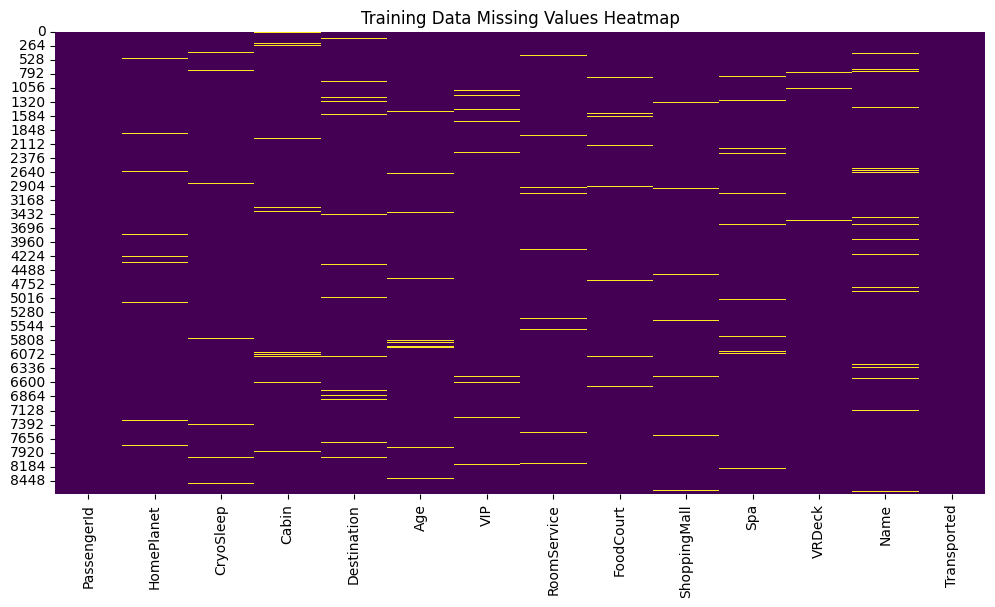

In [104]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), cbar=False, cmap="viridis")
plt.title("Training Data Missing Values Heatmap")
plt.show()

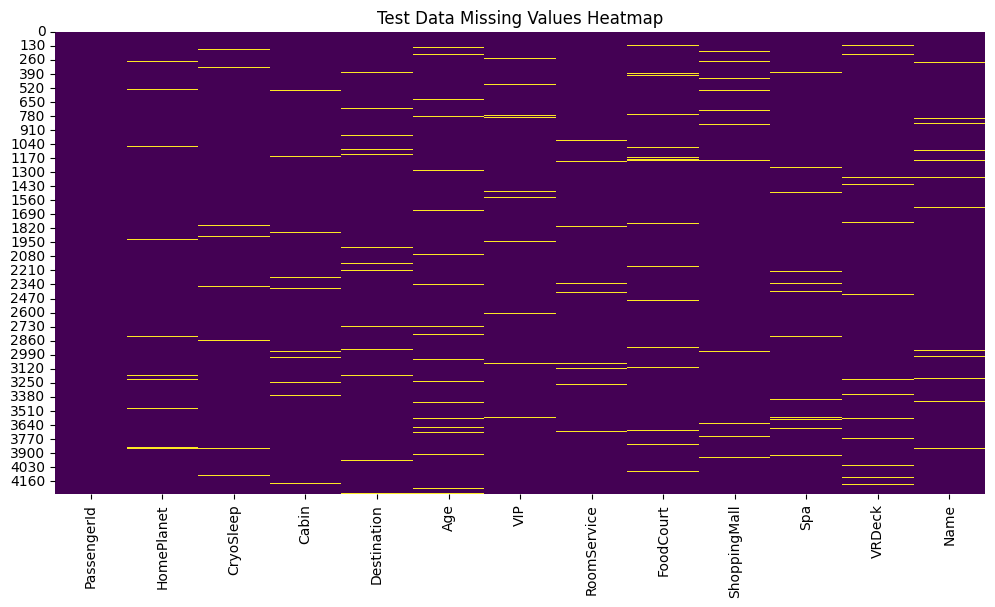

In [105]:
plt.figure(figsize=(12,6))
sns.heatmap(test.isnull(), cbar=False, cmap="viridis")
plt.title("Test Data Missing Values Heatmap")
plt.show()

No obvious trends in null values are seen from this chart. Performing a chi-squared test with null values from each category compared to the 'Transported' variable will tell if a correlation is present or not in the training data. 

Here the **null hypothesis** is that there is no relationship between the 'Transported' variable and whether a value is missing or not in a given feature. 

The **alternate hypothesis** is that there is a statistically significant relationship between the 'Transported' variable and a feature's absence of values. 

This is done at the 95% confidence level: 

In [106]:
alpha = 0.05
for x in train.columns:
    contingency_table = pd.crosstab(train['Transported'], train[f'{x}'].isnull())
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print('contingengy table \n', contingency_table)
    print(f"Chi-Squared Statistic: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    if p < alpha:
        print(f"Reject the null hypothesis - There is a relationship between transported and missing {x} values.")
    else:
        print(f"Fail to reject the null hypothesis - There is no relationship between transported and missing {x} values.")
    print()


contingengy table 
 PassengerId  False
Transported       
False         4315
True          4378
Chi-Squared Statistic: 0.0
p-value: 1.0
Degrees of Freedom: 0
Fail to reject the null hypothesis - There is no relationship between transported and missing PassengerId values.

contingengy table 
 HomePlanet   False  True 
Transported              
False         4217     98
True          4275    103
Chi-Squared Statistic: 0.03294467954367926
p-value: 0.8559698802824356
Degrees of Freedom: 1
Fail to reject the null hypothesis - There is no relationship between transported and missing HomePlanet values.

contingengy table 
 CryoSleep    False  True 
Transported              
False         4204    111
True          4272    106
Chi-Squared Statistic: 0.14677919790361654
p-value: 0.7016324713451103
Degrees of Freedom: 1
Fail to reject the null hypothesis - There is no relationship between transported and missing CryoSleep values.

contingengy table 
 Cabin        False  True 
Transported         

According to the chi squared test, there is no relationship between missing values and the target variable (passenger transport to a new dimension). Therefore, the missing values are likely missing completely at random. 

The missing values can be imputed and will be further analyzed variable by variable.

As a final check for missing values, are there any empty strings? 

In [107]:
np.where(train.map(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [108]:
np.where(test.map(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

No empty strings in training or test data.

## Variable exploration: 

### Transported

Looking at the distribution of the target variable: 

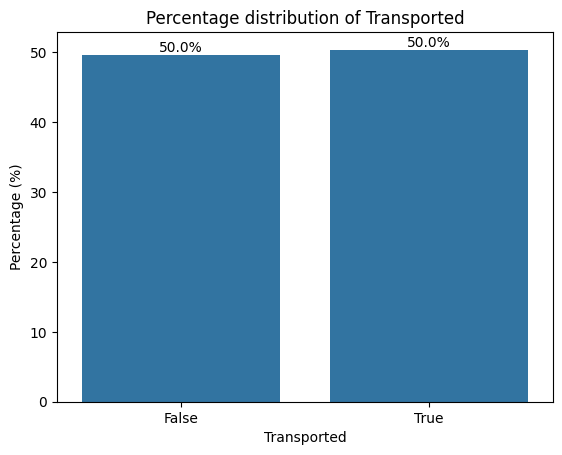

In [109]:
percent_dist(train, 'Transported')

It seems that about half of passengers were transported to an alternate dimension. It will be easier later on (for correlations) if this is an integer type: 

In [110]:
train['Transported'] = train['Transported'].astype(int)

## Numerical variables: 

Looking at numerical variables: 

### Age: 

Looking at the missing age values: 

In [111]:
print('Training age null values:', train['Age'].isnull().sum())
print('Test age null values:', test['Age'].isnull().sum())

Training age null values: 179
Test age null values: 91


The age variable has 179 missing values in the training set and 91 missing values in the test set. These will likely be imputed, and so an indicator column can be added to the dataframe: 

In [112]:
train['age_missing'] = train['Age'].isnull().astype(int)
test['age_missing'] = test['Age'].isnull().astype(int)

Looking at the boxplot and distribution for age: 

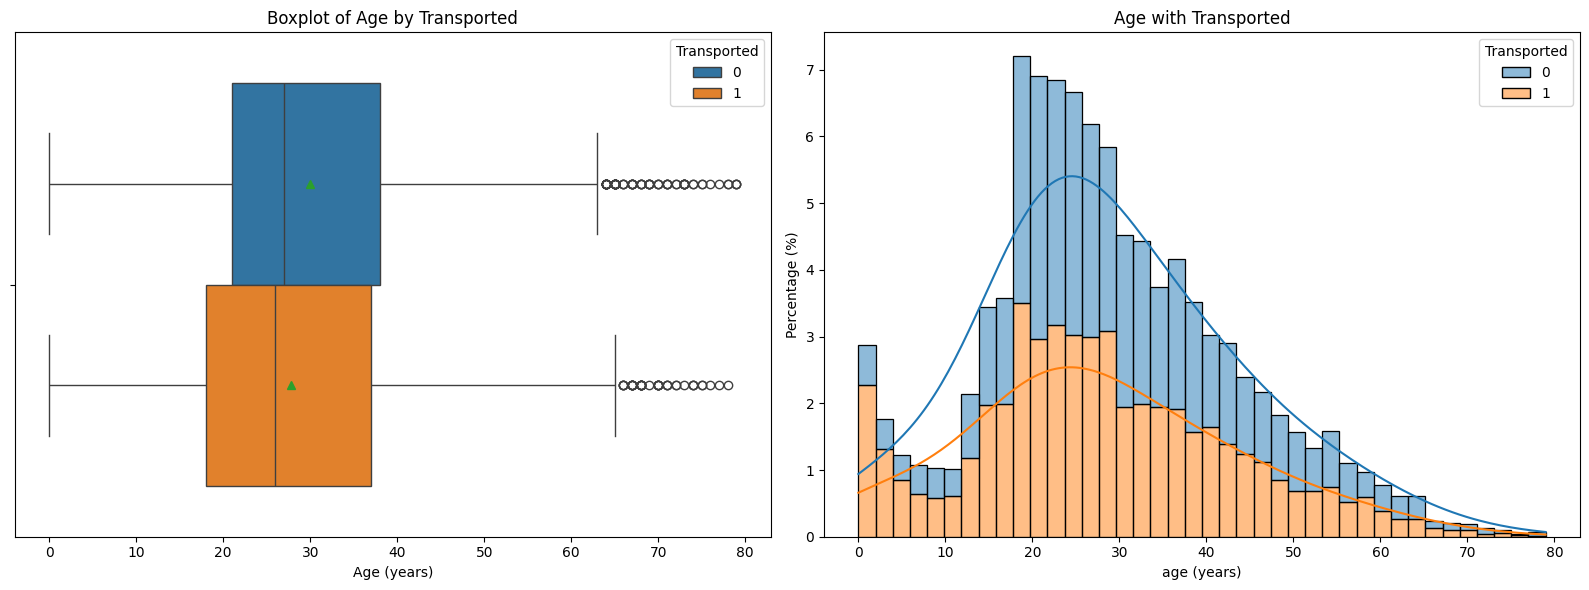

In [113]:
fix, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(data=train, x='Age', hue='Transported', showmeans=True, ax=axes[0]).set(title='Boxplot of Age by Transported', xlabel='Age (years)');
num_dist_ins(train, 'Age', 40, axes[1], 'age (years)')
plt.tight_layout()
plt.show()


Most people are aged 20-40 years old, with some people who are over about age 73. These outliers will not be removed, as these are reasonable ages for people to be. No significant difference in age is seen for those transported vs. not-transported. The age distribution is slightly right tailed, and the missing age values will be imputed with the median age as the missing values seem to be missing completely at random:  

In [114]:
num_imputer = SimpleImputer(strategy='median')
train['Age'] = num_imputer.fit_transform(train[['Age']])
test['Age'] = num_imputer.transform(test[['Age']])
print('Training age null values:', train['Age'].isnull().sum())
print('Test age null values:', test['Age'].isnull().sum())

Training age null values: 0
Test age null values: 0


No more null values are present for the age variable.

### Billed variables: 

The rest of the numerical variables are all related to the amount of money that a given passenger is spending on the ship: 

In [115]:
billed_vars = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

Indicator variables can be added here, as the missing values will likely be imputed: 

In [116]:
for x in billed_vars:
    train[f'{x}_missing'] = train[f'{x}'].isnull().astype(int)
    test[f'{x}_missing'] = test[f'{x}'].isnull().astype(int)

Looking at boxplots for these: 


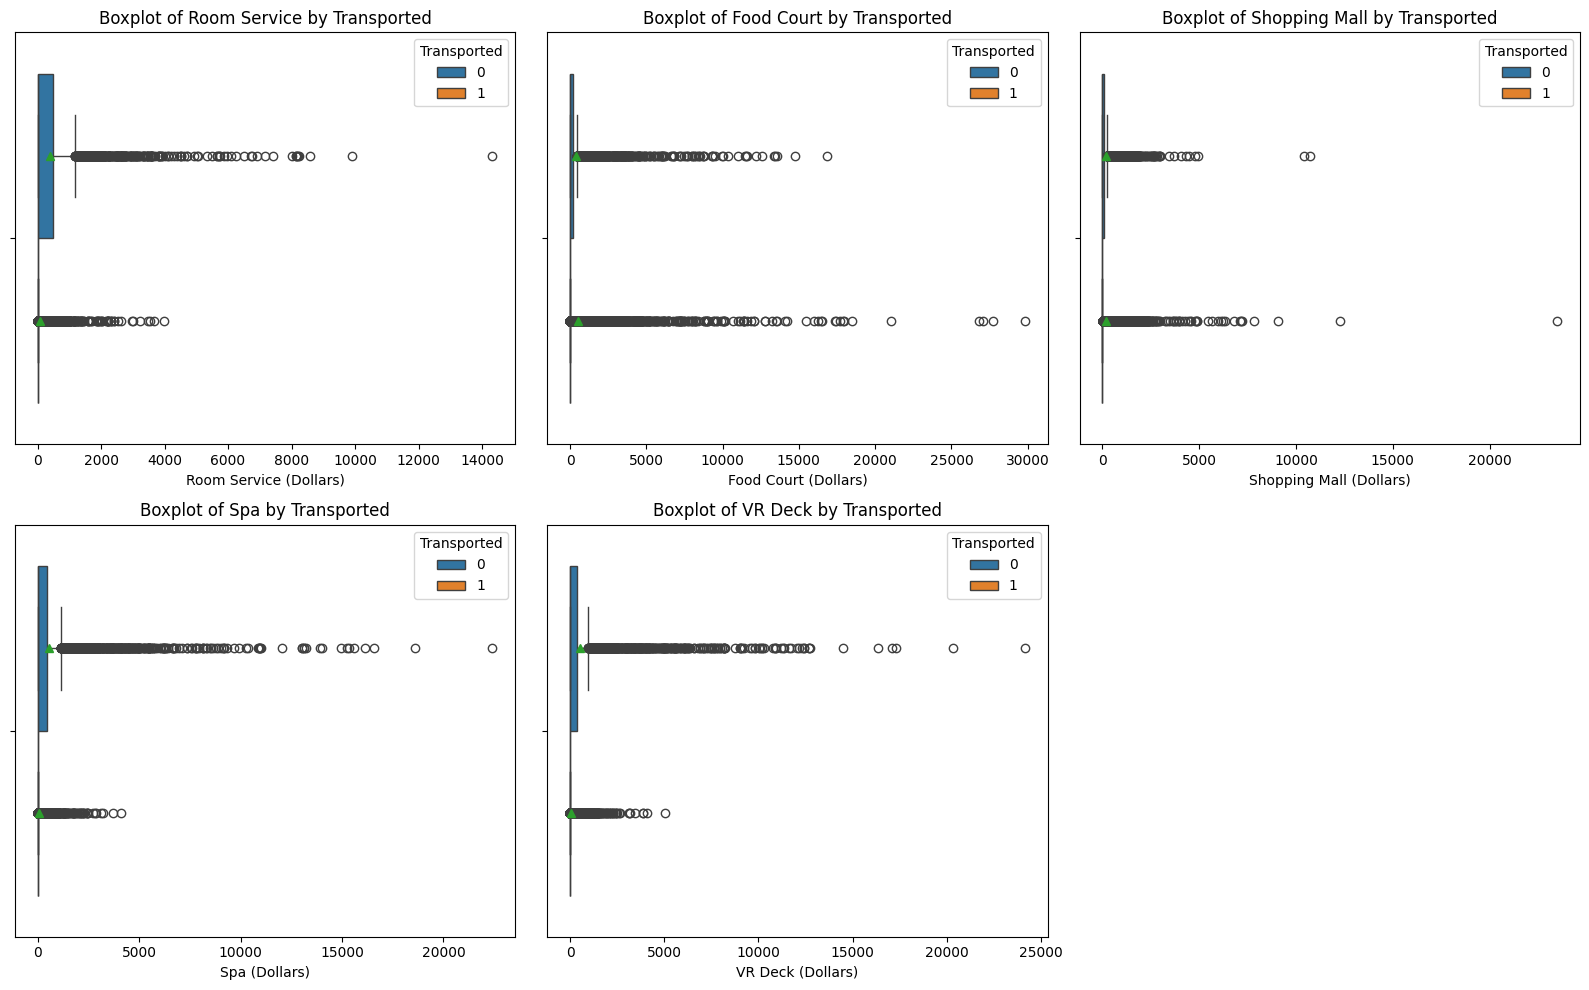

In [117]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
sns.boxplot(data=train, x='RoomService', hue='Transported', showmeans=True, ax=axes[0][0]).set(title='Boxplot of Room Service by Transported', xlabel='Room Service (Dollars)');
sns.boxplot(data=train, x='FoodCourt', hue='Transported', showmeans=True, ax=axes[0][1]).set(title='Boxplot of Food Court by Transported', xlabel='Food Court (Dollars)');
sns.boxplot(data=train, x='ShoppingMall', hue='Transported', showmeans=True, ax=axes[0][2]).set(title='Boxplot of Shopping Mall by Transported', xlabel='Shopping Mall (Dollars)');
sns.boxplot(data=train, x='Spa', hue='Transported', showmeans=True, ax=axes[1][0]).set(title='Boxplot of Spa by Transported', xlabel='Spa (Dollars)');
sns.boxplot(data=train, x='VRDeck', hue='Transported', showmeans=True, ax=axes[1][1]).set(title='Boxplot of VR Deck by Transported', xlabel='VR Deck (Dollars)');
fig.delaxes(axes[1][2])
plt.tight_layout()
plt.show()

It seems that most people do not spend any money at all, and a few people spend a lot of money. All distributions are skewed to the right with some extreme outliers. In general, people who were transported are shown to spend more money on Room Service, the Spa, and the VR Deck than people who were not transported. Looking at a general summary for these variables gives: 

In [118]:
train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].describe()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,224.687617,458.077203,173.729169,311.138778,304.854791
std,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.000000,76.000000,27.000000,59.000000,46.000000
max,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Indeed, 50% of passengers in each category do not spend any money. Therefore, the missing values in these categories will be imputed with the median value (0):

In [119]:
median_imputer = SimpleImputer(strategy='median')
for x in billed_vars:
    train[f'{x}'] = median_imputer.fit_transform(train[[f'{x}']])
    test[f'{x}'] = median_imputer.transform(test[[f'{x}']])
print('Training billed vars null values: \n', train[billed_vars].isnull().sum())
print('Test billed vars null values: \n', test[billed_vars].isnull().sum())

Training billed vars null values: 
 RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64
Test billed vars null values: 
 RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64


No more null values are present for the billed variables.

A new variable can be created here which indicates the total amount of money that a passenger has spent: 

In [120]:
train['tot_spend'] = train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
test['tot_spend'] = test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

Looking at the distribution of the total amount spent: 

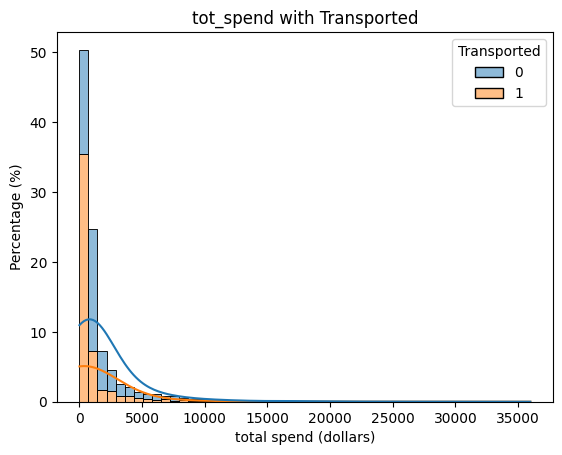

In [121]:
num_dist_ins(train, 'tot_spend', 50, plt.gca(), 'total spend (dollars)')

It seems that in general, the passengers that do spend on ship amenities have less of a chance of being transported. This does not seems to be the case for those who do not purchase anything, though. As these billed variables are quite skewed, binning them could provide more interesting insights. 

As the distribution for the total amount spent is a little different than that for the other billed variables, the bin values are slightly modified for this variable: 

In [122]:
bins = [0, 1, 50, 500, 1000, 5000, np.inf]
labels = ['0', '1-50', '50-500', '500-1000', '1000-5000', '5000+']
for x in billed_vars:
    train[f'{x}_binned'] = pd.cut(train[f'{x}'], bins=bins, labels=labels, include_lowest=True).astype(str)
    train[f'{x}_binned'] = pd.Categorical(train[f'{x}_binned'], categories=labels, ordered=True)
    test[f'{x}_binned'] = pd.cut(test[f'{x}'], bins=bins, labels=labels, include_lowest=True).astype(str)
    test[f'{x}_binned'] = pd.Categorical(test[f'{x}_binned'], categories=labels, ordered=True)


bins = [0, 1, 750, 1000, 2500, 5000, np.inf]
labels_tot = ['0', '1-750', '750-1000', '1000-2500', '2500-5000', '5000+']
train[f'tot_spend_binned'] = pd.cut(train[f'{x}'], bins=bins, labels=labels_tot, include_lowest=True).astype(str)
test[f'tot_spend_binned'] = pd.cut(test[f'{x}'], bins=bins, labels=labels_tot, include_lowest=True).astype(str)
train['tot_spend_binned'] = pd.Categorical(train['tot_spend_binned'], categories=labels_tot, ordered=True)
test['tot_spend_binned'] = pd.Categorical(test['tot_spend_binned'], categories=labels_tot, ordered=True)


Now, histograms of these binned variables can be examined: 

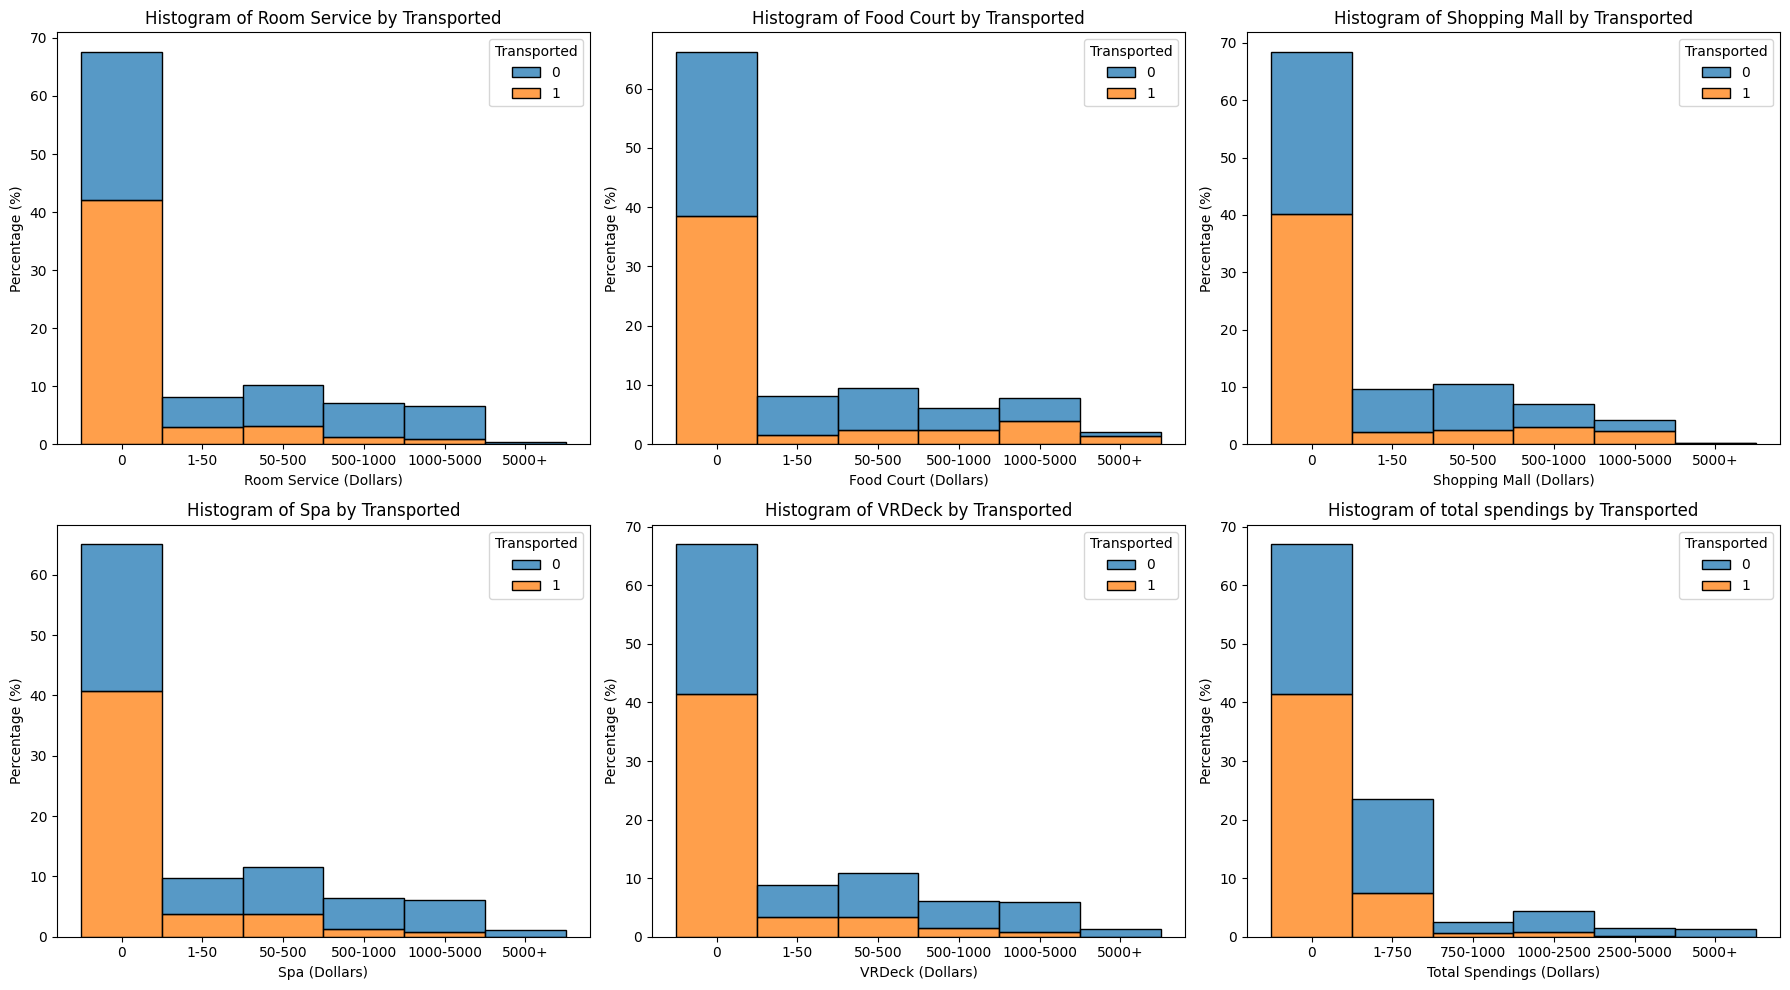

In [123]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.histplot(data=train, x='RoomService_binned', hue='Transported', multiple='stack', stat='percent', discrete=True, ax=axes[0][0]).set(title='Histogram of Room Service by Transported', xlabel='Room Service (Dollars)', ylabel='Percentage (%)');
sns.histplot(data=train, x='FoodCourt_binned', hue='Transported', multiple='stack', stat='percent', discrete=True, ax=axes[0][1]).set(title='Histogram of Food Court by Transported', xlabel='Food Court (Dollars)', ylabel='Percentage (%)');
sns.histplot(data=train, x='ShoppingMall_binned', hue='Transported', multiple='stack', stat='percent', discrete=True, ax=axes[0][2]).set(title='Histogram of Shopping Mall by Transported', xlabel='Shopping Mall (Dollars)', ylabel='Percentage (%)');
sns.histplot(data=train, x='Spa_binned', hue='Transported', multiple='stack', stat='percent', discrete=True, ax=axes[1][0]).set(title='Histogram of Spa by Transported', xlabel='Spa (Dollars)', ylabel='Percentage (%)');
sns.histplot(data=train, x='VRDeck_binned', hue='Transported', multiple='stack', stat='percent', discrete=True, ax=axes[1][1]).set(title='Histogram of VRDeck by Transported', xlabel='VRDeck (Dollars)', ylabel='Percentage (%)');
sns.histplot(data=train, x='tot_spend_binned', hue='Transported', multiple='stack', stat='percent', discrete=True, ax=axes[1][2]).set(title='Histogram of total spendings by Transported', xlabel='Total Spendings (Dollars)', ylabel='Percentage (%)');
plt.tight_layout()
plt.show()

These histograms show that over half of people who did not spend any money on the ship have been transported. Some other remarks include: 
- When passengers have spent over 500$ on room service, then they are generally not transported.
- When passengers spend over 5000$ in the food court, they are more likely to be transported. 
- When passengers spend between 1-500$ at the shopping mall, they are generally not transported.
- When passengers spend over 50$ in the spa or VR deck, they are generally not transported. 
- In terms of total spendings, when passengers spend over 750$, they generally not transported. It is important to note that over 60% of total passengers did not spend any money on anything in the first place. 

## Categorical Variables: 

### PassengerId

The PassengerID variable is of the form ****_%%, where * stands for the passenger's group number, and % is their number in the group. This can be explored by separating the passenger's group number into a new variable (group), and looking at the size of each group (group_size): 

In [124]:
train['group'] = train['PassengerId'].apply(lambda x: x[:4]).astype(int)
test['group'] = test['PassengerId'].apply(lambda x: x[:4]).astype(int)

train['group_size'] = train.groupby('group')['group'].transform('count')
test['group_size'] = test.groupby('group')['group'].transform('count')

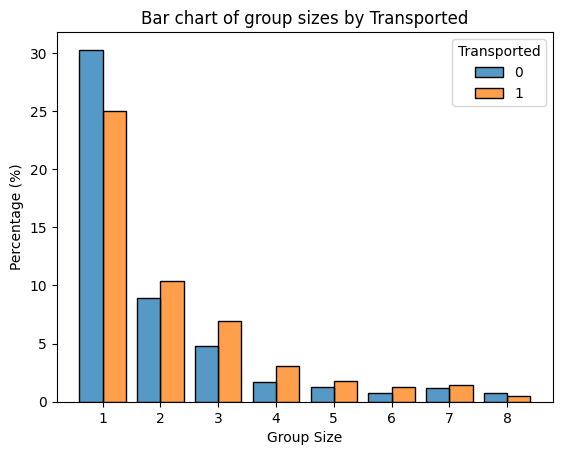

In [125]:
sns.histplot(data=train, x='group_size', hue='Transported', shrink=0.8, multiple='dodge', stat='percent', discrete=True).set(title='Bar chart of group sizes by Transported', xlabel='Group Size', ylabel='Percentage (%)');

Group sizes range from 1-8 people. Most people are in a group alone, where they are transported slightly less frequently than not. Group sizes from 2-7 people are transported a little more often than not. Looking at a violin plot of the group sizes divided by the Transported variable gives: 

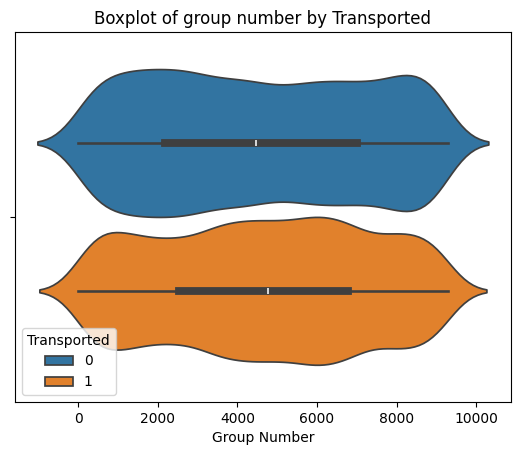

In [126]:
sns.violinplot(data=train, x='group', hue='Transported').set(title='Boxplot of group number by Transported', xlabel='Group Number');

It seems here that the distribution of groups that were not transported  has slightly more lower group numbers (less than 3000) than the distribution of groups that were transported. 

### HomePlanet

To start exploring this variable, the missing values can be filled with a 'Missing' string to indicate their absence:

In [127]:
train['HomePlanet'] = train['HomePlanet'].fillna('Missing')
test['HomePlanet'] = test['HomePlanet'].fillna('Missing')

In [128]:
print('Missing values left in training data:', train['HomePlanet'].isna().sum())
print('Missing values left in test data', test['HomePlanet'].isna().sum())

Missing values left in training data: 0
Missing values left in test data 0


No more missing values are present in the HomePlanet variable. Looking at a bar chart for this variable: 

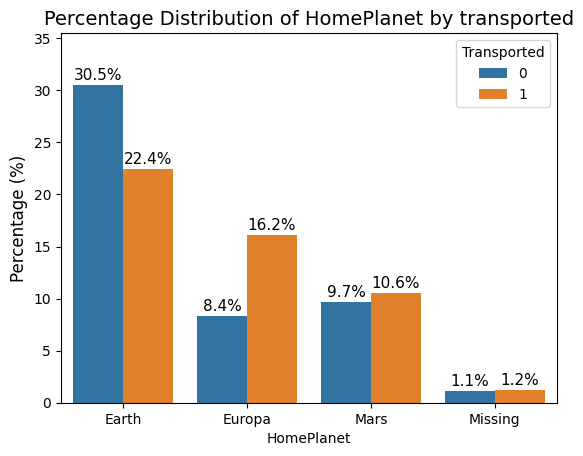

In [129]:
cat_dist_ins(train, 'HomePlanet', plt.gca())

Most people are from Earth, where the rate of getting transported is the lowest. Those from Europa have the highest rate of getting transported, and those from Mars, or with missing Home Planet have about equal rates of transportation.

### CryoSleep

Looking at the null values for the CryoSleep variable: 

In [130]:
print('Null values left in training set:', train['CryoSleep'].isnull().sum())
print('Null values left in test set:', test['CryoSleep'].isnull().sum())

Null values left in training set: 217
Null values left in test set: 93


If a passenger has opted to go into cryosleep, this means that they are not spending any money on the ship's amenities during the trip. Therefore, if any missing values for this category have total spendings over 0, then their cryosleep will be imputed as 'False'. 

In [131]:
train.loc[train['CryoSleep'].isnull() & (train['tot_spend'] > 0), 'CryoSleep'] = False
test.loc[test['CryoSleep'].isnull() & (test['tot_spend'] > 0), 'CryoSleep'] = False
print('Null values left in training set:', train['CryoSleep'].isnull().sum())
print('Null values left in test set:', test['CryoSleep'].isnull().sum())

Null values left in training set: 98
Null values left in test set: 38


There are still 98 null values for this variable in the training set, which will be inputed as 'Missing' for now. 

In [132]:
train['CryoSleep'] = train['CryoSleep'].fillna('Missing').astype(str)
test['CryoSleep'] = test['CryoSleep'].fillna('Missing').astype(str)

In [133]:
print('Null values left in training set:', train['CryoSleep'].isnull().sum())
print('Null values left in test set:', test['CryoSleep'].isnull().sum())

Null values left in training set: 0
Null values left in test set: 0


No null values are left. Looking at the bar chart for the CryoSleep variable according to transported passengers: 

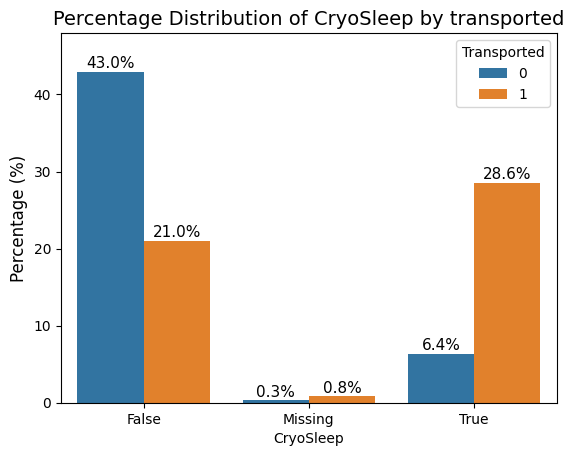

In [134]:
cat_dist_ins(train, 'CryoSleep', plt.gca())

Most passengers chose not to be in cryosleep, and these were generally not transported. Those who did choose to go into cryosleep were often transported. 

### Cabin: 

This variable takes the form d/n/s, where d is the deck, n is the number, and s is the side (P: port, S: starboard). Looking at the null values here: 

In [135]:
print('Null values left in training set:', train['Cabin'].isnull().sum())
print('Null values left in test set:', test['Cabin'].isnull().sum())

Null values left in training set: 199
Null values left in test set: 100


The null values will be filled with 0 in each category as an indicator of missing data: 

In [136]:
train['Cabin'] = train['Cabin'].fillna('0/0/0')
test['Cabin'] = test['Cabin'].fillna('0/0/0')

In [137]:
print('Null values left in training set:', train['Cabin'].isnull().sum())
print('Null values left in test set:', test['Cabin'].isnull().sum())

Null values left in training set: 0
Null values left in test set: 0


Now, there are no null values for this variable. It could be interesting to look at the cabin deck and cabin side separately: 

In [138]:
train['cabin_deck'] = train['Cabin'].apply(lambda x: x[0]).astype(str)
train['cabin_side'] = train['Cabin'].apply(lambda x: x[-1]).astype(str)
test['cabin_deck'] = test['Cabin'].apply(lambda x: x[0]).astype(str)
test['cabin_side'] = test['Cabin'].apply(lambda x: x[-1]).astype(str)

Looking at bar charts for these variables: 

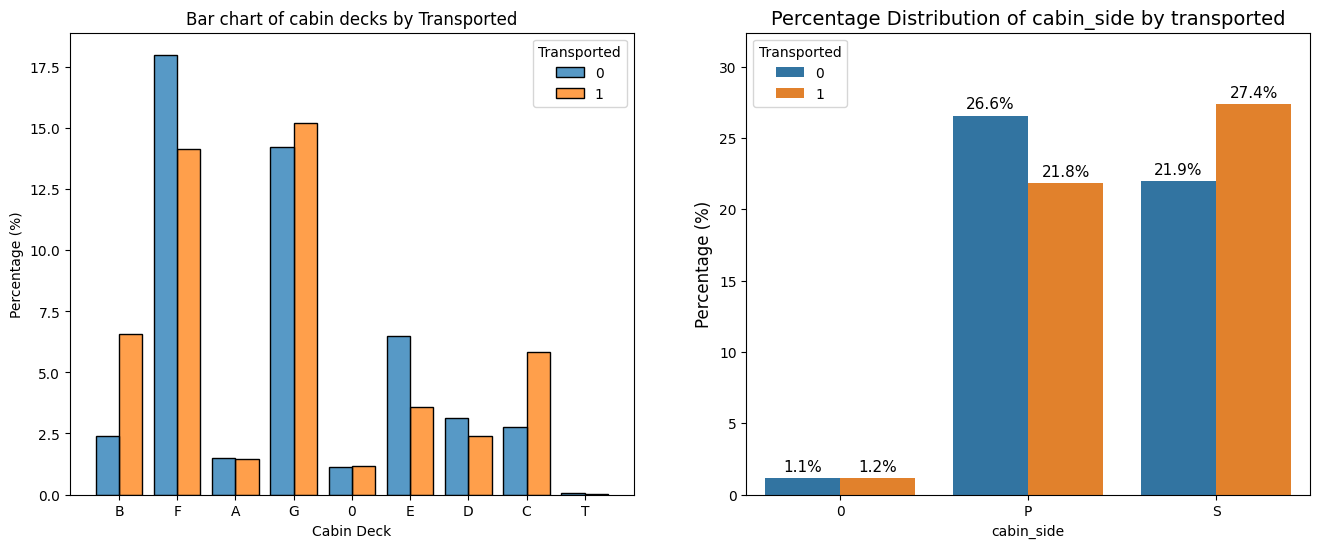

In [139]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(data=train, x='cabin_deck', hue='Transported', multiple='dodge', stat='percent', shrink=0.8, discrete=True, ax=axs[0]).set(title='Bar chart of cabin decks by Transported', xlabel='Cabin Deck', ylabel='Percentage (%)');
cat_dist_ins(train, 'cabin_side', axs[1])

Most people are in cabin deck F or G. People have higher frequencies of being transported in cabin deck B or C. Very few people are in cabin deck T. It seems as though about the same number of people are in cabin side P or S, though more people are transported in cabin side S. 

### Destination

Looking at the number of null values in the destination variable: 

In [140]:
train['Destination'].isnull().sum()
print('Null values in training set:', train['Destination'].isnull().sum())
print('Null values in test set:', test['Destination'].isnull().sum())

Null values in training set: 182
Null values in test set: 92


These also can be filled with the 'Missing' value: 

In [141]:
train['Destination'] = train['Destination'].fillna('Missing')
test['Destination'] = test['Destination'].fillna('Missing')

In [142]:
print('Null values left in training set:', train['Destination'].isnull().sum())
print('Null values left in test set:', test['Destination'].isnull().sum())

Null values left in training set: 0
Null values left in test set: 0


Looking at the bar chart for destination according to the transported variable: 

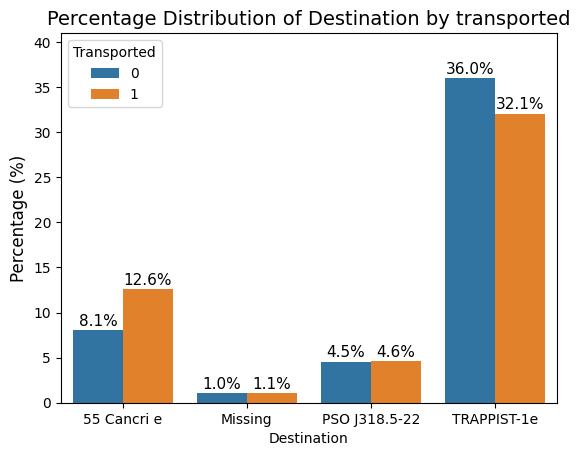

In [143]:
cat_dist_ins(train, 'Destination', plt.gca())

There are three destinations, and most people are headed towards TRAPPIST-1e. Slightly more passengers are transported with destination 55 Cancri e, and slightly less passengers are transported with destination TRAPPIST-1e. 

### VIP

Looking at the number of null VIP values: 

In [144]:
print('Null values in training set:', train['VIP'].isnull().sum())
print('Null values in test set:', test['VIP'].isnull().sum())

Null values in training set: 203
Null values in test set: 93


Looking at the categories for this variable: 

In [145]:
train['VIP'].value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

Barely any passengers are VIP on the ship. Therefore, the null values will be filled with False for this category. An indicator column will be added also to keep track of missing values for this category: 

In [146]:
train['VIP_missing'] = train['VIP'].isnull().astype(int)
test['VIP_missing'] = test['VIP'].isnull().astype(int)

In [147]:
train['VIP'] = train['VIP'].fillna('False').astype(bool)
test['VIP'] = test['VIP'].fillna('False').astype(bool)

In [148]:
print('Null values left in training set:', train['VIP'].isnull().sum())
print('Null values left in training set:', test['VIP'].isnull().sum())

Null values left in training set: 0
Null values left in training set: 0


Looking at the distribution of VIP passengers grouped by the transported variable:

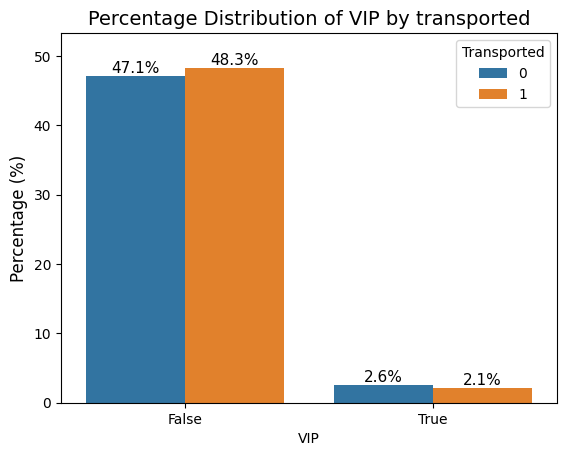

In [149]:
cat_dist_ins(train, 'VIP', plt.gca())

No significant difference is seen between the two groups in terms of the transported variable. It will be easier if this is of integer type for looking at correlations and for modelling: 

In [150]:
train['VIP'] = train['VIP'].astype(int)
test['VIP'] = test['VIP'].astype(int)

### Name

In [151]:
train['Name'].isnull().sum()
print('Null values in training set:', train['Name'].isnull().sum())
print('Null values in test set:', test['Name'].isnull().sum())

Null values in training set: 200
Null values in test set: 94


The null name values will be filled with an indicator string 'No Name': 

In [152]:
train['Name'] = train['Name'].fillna('No Name')
test['Name'] = test['Name'].fillna('No Name')
print('Null values left in training set:', train['Name'].isnull().sum())
print('Null values left in test set:', test['Name'].isnull().sum())

Null values left in training set: 0
Null values left in test set: 0


The name variable can be split into first and last name variables: 

In [153]:
train[['first_name', 'last_name']] = train['Name'].str.split(' ', n=1, expand=True)
test[['first_name', 'last_name']] = test['Name'].str.split(' ', n=1, expand=True)

In [154]:
train['first_name'].value_counts().head(10)

first_name
No        200
Idace      13
Loree      12
Dandra     11
Gwendy     11
Glena      11
Kaye       11
Violan     10
Ale        10
Patoya     10
Name: count, dtype: int64

Idace, Loree, Dandra, Gwendy, Glena, and Kaye are the top first names. 

In [155]:
train['last_name'].value_counts().head(10)

last_name
Name          200
Casonston      18
Oneiles        16
Domington      15
Litthews       15
Cartez         14
Browlerson     14
Garnes         14
Fulloydez      14
Hinglendez     13
Name: count, dtype: int64

Having the same last name is more common, with the most popular ones being: Casonston, Oneiles, Domington, and Litthews. Are there any duplicate names? 

In [156]:
dup_name = train[train.duplicated(subset='Name', keep=False)]
dup_name = dup_name[dup_name['Name'] != 'No Name'].sort_values('Name')
dup_name[train.columns].head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Spa_binned,VRDeck_binned,tot_spend_binned,group,group_size,cabin_deck,cabin_side,VIP_missing,first_name,last_name
7270,7775_01,Europa,False,C/253/P,55 Cancri e,28.0,0,7.0,489.0,0.0,...,1-50,5000+,5000+,7775,1,C,P,0,Alraium,Disivering
6296,6665_01,Europa,True,B/222/P,55 Cancri e,17.0,0,0.0,0.0,0.0,...,0,0,0,6665,4,B,P,0,Alraium,Disivering
476,0512_02,Europa,True,D/18/S,TRAPPIST-1e,55.0,0,0.0,0.0,0.0,...,0,0,0,512,2,D,S,0,Ankalik,Nateansive
2930,3176_01,Europa,False,E/196/P,TRAPPIST-1e,77.0,0,0.0,9032.0,0.0,...,50-500,1000-5000,1000-2500,3176,1,E,P,0,Ankalik,Nateansive
8488,9071_01,Earth,False,F/1855/P,55 Cancri e,22.0,0,0.0,0.0,1072.0,...,1-50,1-50,1-750,9071,1,F,P,0,Anton,Woody


Some people do have the same names, though these do not seem to be the same people, as other values (such as age, or amount spent) are different. 

Now, looking at relationships between variables: 

## Variables together

Looking at the relationship between age and total amount spent: 

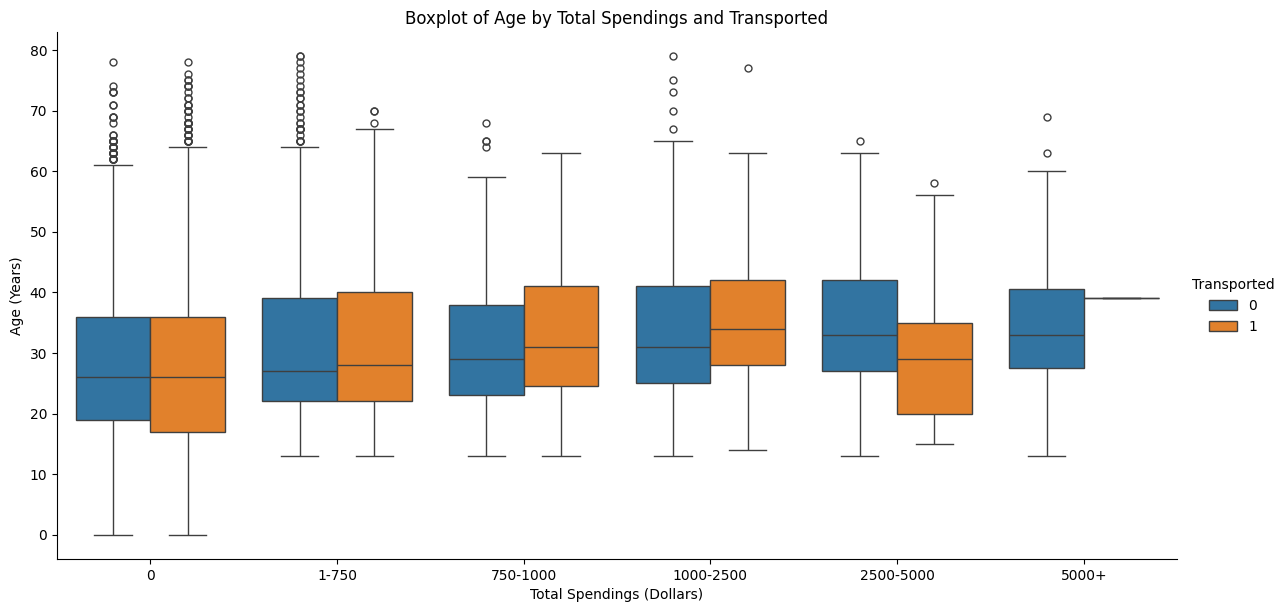

In [157]:
sns.catplot(data=train, y='Age', x='tot_spend_binned', hue='Transported', order = ['0', '1-750', '750-1000', '1000-2500', '2500-5000', '5000+'], kind='box', height=6, aspect=2).set(title='Boxplot of Age by Total Spendings and Transported', xlabel='Total Spendings (Dollars)', ylabel='Age (Years)');

This plot shows that passengers spend money on ship amenities when they are aged over 10 years old. Passengers are not transported who spend a total of over 5000$. When spending between 1-750$ or between 1000-2500$ on ship amenities, it seems that passengers who were not transported include older people (over 65 years old). 

Now, looking at age and group size:

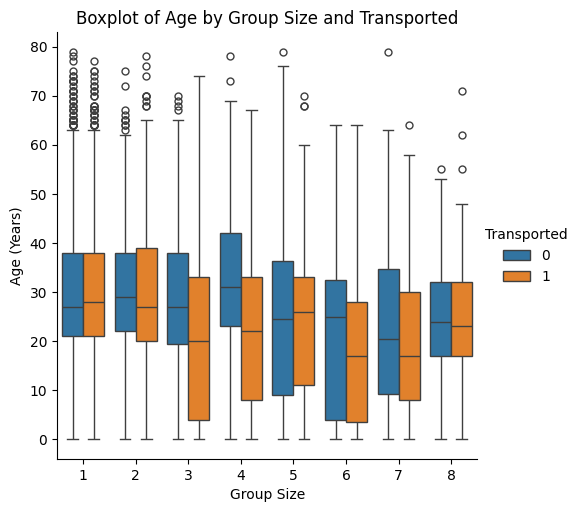

In [158]:
sns.catplot(data=train, x='group_size', y='Age', hue='Transported', kind='box').set(title='Boxplot of Age by Group Size and Transported', xlabel='Group Size', ylabel='Age (Years)');

Looking at age with group size, this plot shows that younger passengers in a group size of 3 or 4 seem to be more likely to be transported than not. More elderly passengers (over 65 years old) are outliers when travelling alone or in a group of two. Larger group sizes (6-8) tend to have younger passengers also. 

Looking at home planet and destination together: 


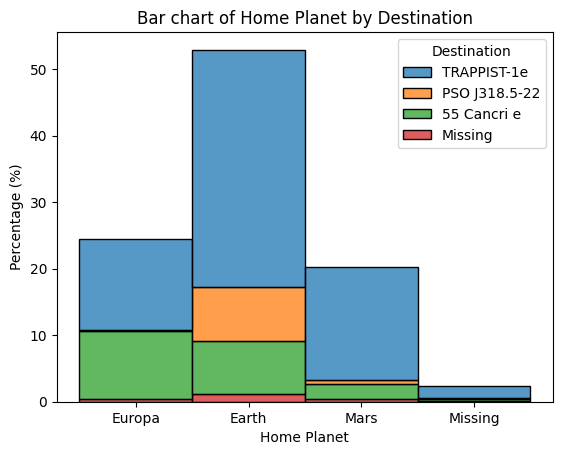

In [159]:
sns.histplot(data=train, x='HomePlanet', hue='Destination', multiple='stack', stat='percent', discrete=True).set(title='Bar chart of Home Planet by Destination', xlabel='Home Planet', ylabel='Percentage (%)');

When looking at the home planet with destinations, most people from Earth and from Mars are going to TRAPPIST-1e, most people going to PSE J318.5-22 are from Earth, and most people with missing Destination are from Earth. Also, most people with missing HomePlanet are going to TRAPPIST-1e, and those from Europa are going to either TRAPPIST-1e or 55 Cancri e. 

Looking at cabin deck with home planet: 

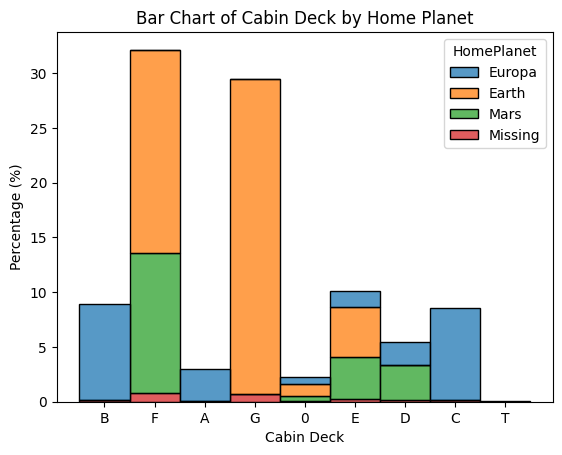

In [160]:
sns.histplot(data=train, hue='HomePlanet', x='cabin_deck', multiple='stack', stat='percent', discrete=True).set(title='Bar Chart of Cabin Deck by Home Planet', xlabel='Cabin Deck', ylabel='Percentage (%)');


This plot shows that cabin deck assignment depends on a person's home planet. Most people with cabin_deck A, B, or C are from Europa. Those from Earth are either in cabin_deck F or G, which also seem to be the largest cabins. Almost no one is in cabin_deck T. 

## Correlations

Now, correlations between variables can be examined. To begin, phi-k correlations will be looked at to establish correlation strength between variables.

Some variables have many unique values, and correlations including these variables will not be examined: 
- PassengerId
- Name
- first_name
- last_name
- cabin

In [161]:
dropped_cols = train[['PassengerId', 'Name', 'first_name', 'last_name', 'Cabin']]
phik_vars = train.drop(['PassengerId', 'Name', 'first_name', 'last_name', 'Cabin'], axis=1)

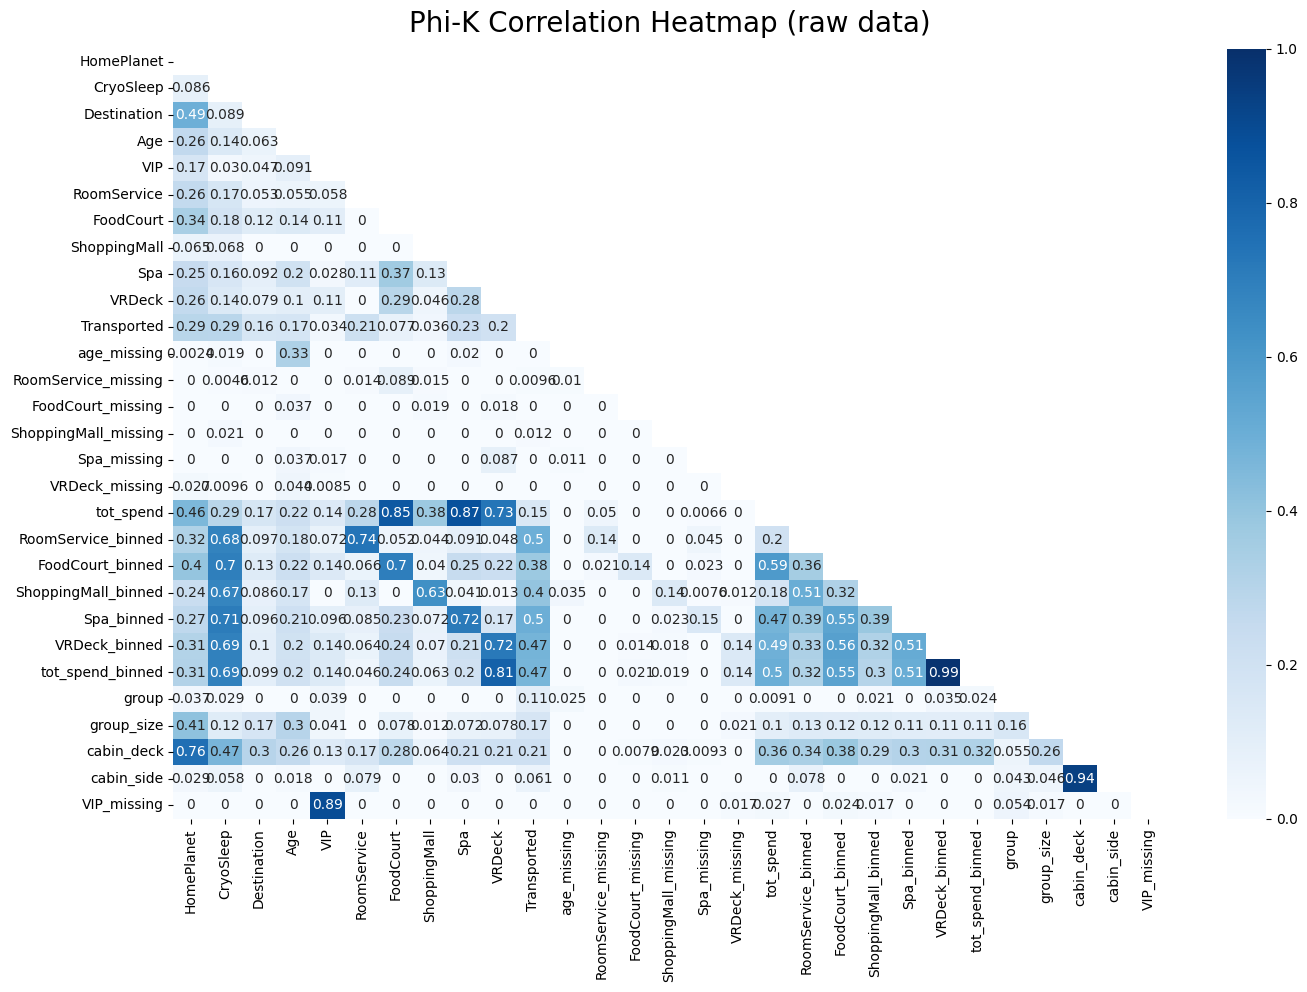

In [162]:
phik_bins = {
    'HomePlanet': 'categorical',
    'CryoSleep': 'categorical',
    'Destination': 'categorical',
    'Age': 'interval',
    'VIP': 'categorical',
    'RoomService': 'interval',
    'FoodCourt': 'interval',
    'ShoppingMall': 'interval',
    'Spa': 'interval',
    'VRDeck': 'interval',
    'Transported': 'categorical',
    'age_missing': 'categorical',
    'RoomService_missing': 'categorical',
    'FoodCourt_missing': 'categorical',
    'ShoppingMall_missing': 'categorical',
    'Spa_missing': 'categorical',
    'VRDeck_missing': 'categorical',
    'tot_spend': 'interval',
    'RoomService_binned': 'ordinal',
    'FoodCourt_binned': 'ordinal',
    'ShoppingMall_binned': 'ordinal',
    'Spa_binned': 'ordinal',
    'VRDeck_binned': 'ordinal',
    'tot_spend_binned': 'ordinal',
    'group': 'interval',
    'group_size': 'interval',
    'cabin_deck': 'categorical',
    'cabin_side': 'categorical',
    'VIP_missing': 'categorical'
}

interval_cols = [col for col, v in phik_bins.items() if v =='interval' and col in phik_vars.columns]
phik_overview = phik_vars.phik_matrix(interval_cols=interval_cols)
plt.figure(figsize=(16,10))
mask = np.triu(np.ones_like(phik_overview, dtype=bool))
heatmap = sns.heatmap(phik_overview, annot=True, mask=mask, cmap='Blues', vmin=0, vmax=1)
heatmap.set_title('Phi-K Correlation Heatmap (raw data)', fontdict={'fontsize':20}, pad=12)
plt.show()

From this, it seems that the missing indicator columns are not correlated with any variables other than their non-indicator counterparts. These will be dropped to see insights from this correlation matrix more easily: 

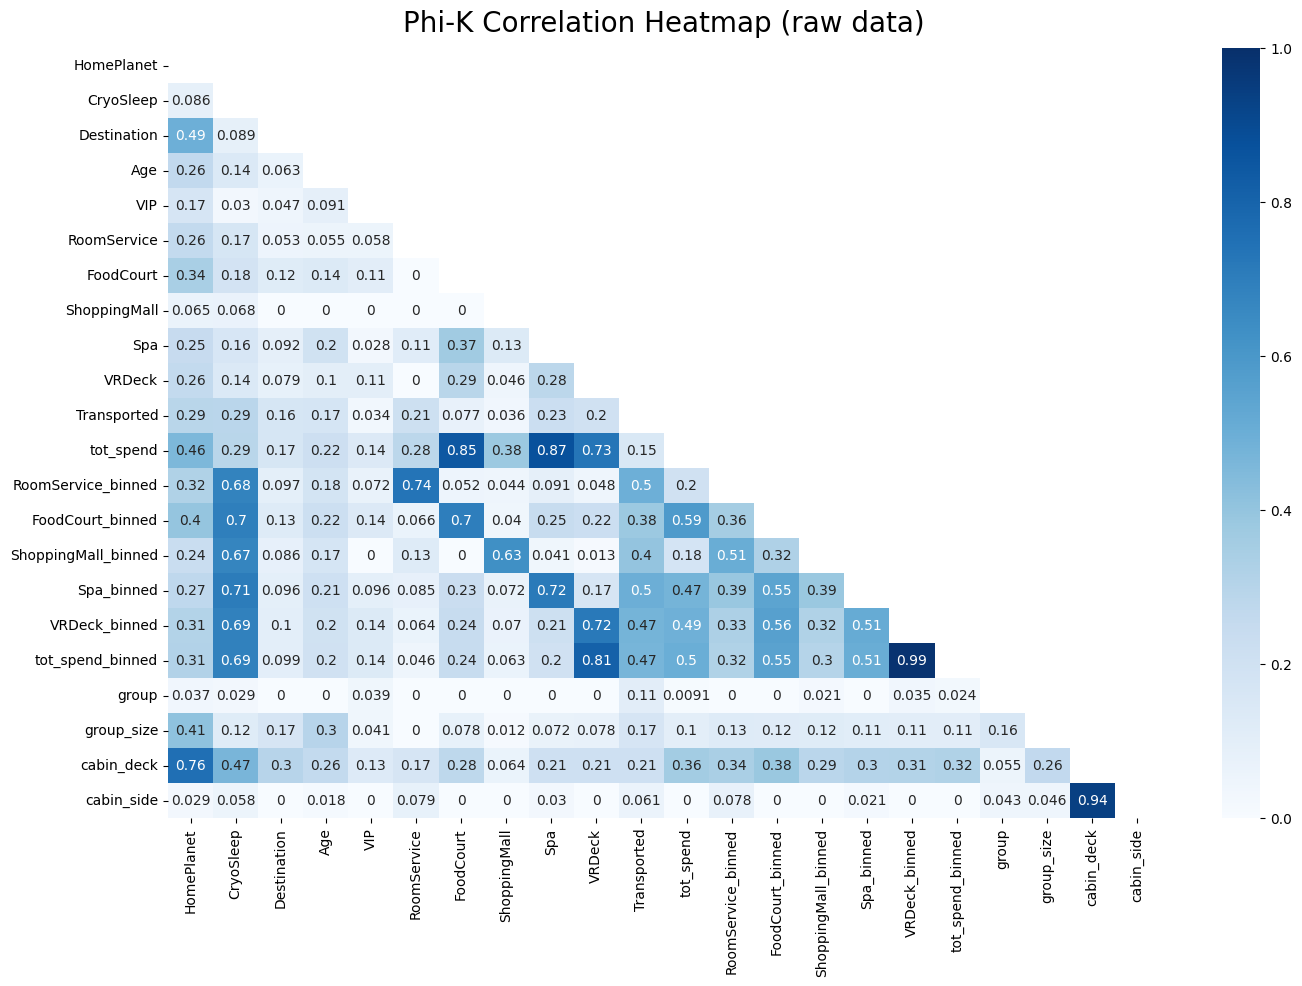

In [163]:
phik_vars = train.drop(['PassengerId', 'Name', 'first_name', 'last_name', 'Cabin', 'age_missing', 'RoomService_missing', 'ShoppingMall_missing', 'Spa_missing', 'VRDeck_missing', 'VIP_missing', 'FoodCourt_missing'], axis=1)
dropped_missing_cols = train[['age_missing', 'RoomService_missing', 'ShoppingMall_missing', 'Spa_missing', 'VRDeck_missing', 'VIP_missing', 'FoodCourt_missing']]
phik_overview = phik_vars.phik_matrix(interval_cols=interval_cols)
plt.figure(figsize=(16,10))
mask = np.triu(np.ones_like(phik_overview, dtype=bool))
heatmap = sns.heatmap(phik_overview, annot=True, mask=mask, cmap='Blues', vmin=0, vmax=1)
heatmap.set_title('Phi-K Correlation Heatmap (raw data)', fontdict={'fontsize':20}, pad=12)
plt.show()

From here, the binned billed variables and their non-binned counterparts are evidently strongly correlated with each other. Other than this, interesting correlations (with phi-k correlation coefficient of over 0.4) include: 
- HomePlanet and vabin_deck (0.76), 
- HomePlanet and group_size (0.41), 
- HomePlanet and billed variables (notable FoodCourt_binned (0.4) and total_spend (0.46)),
- HomePlanet and destination (0.49), 
- CryoSleep and cabin_deck (0.47),
- CryoSleep and binned billed variables (0.68-0.71),
- cabin_deck and cabin_side (0.94)
- Transported and billed binned variables (0.38-0.5)

To properly examine correlations between features and the target variable (Transported), these can be isolated: 

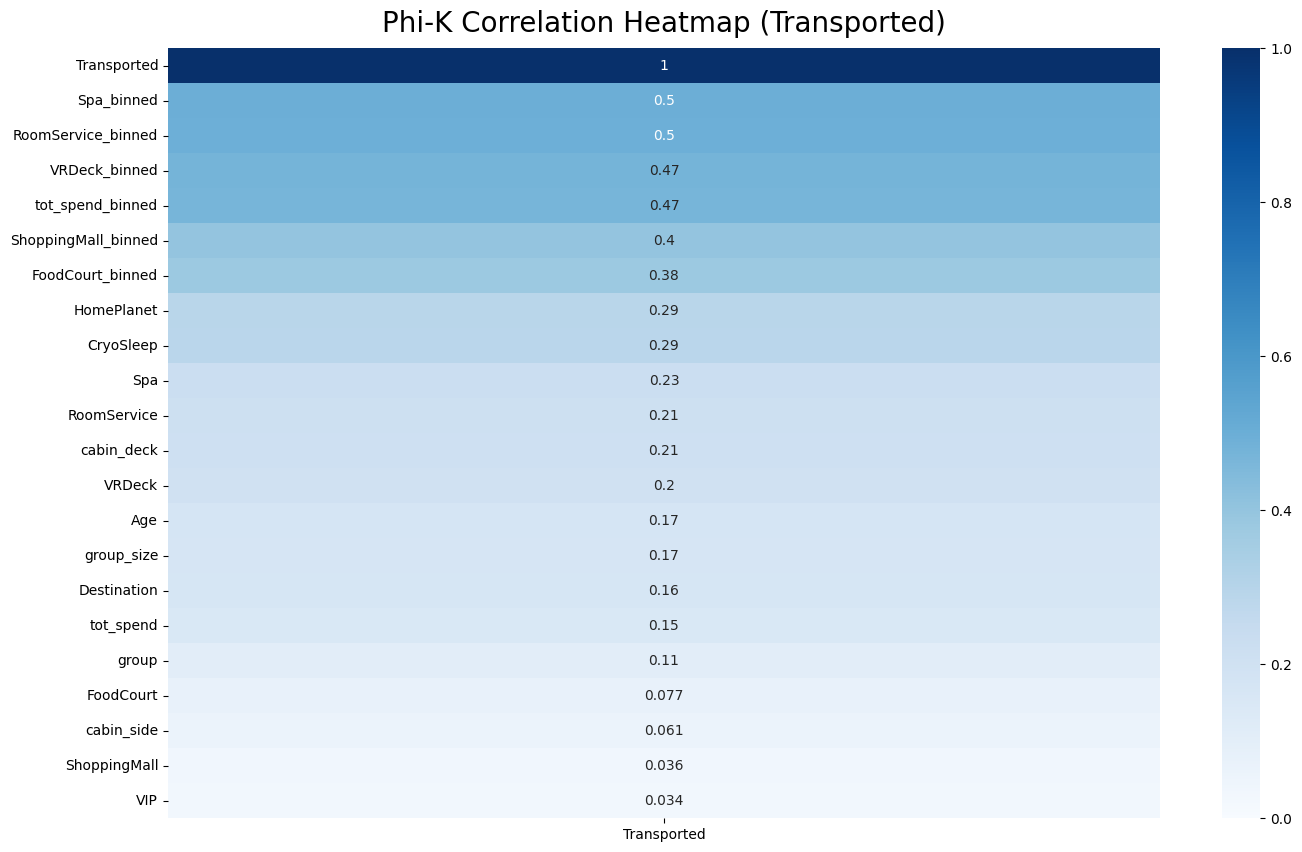

In [164]:
plt.figure(figsize=(16,10))
heatmap = sns.heatmap(phik_overview[['Transported']].sort_values(by='Transported', ascending=False), annot=True, cmap='Blues', vmin=0, vmax=1)
heatmap.set_title('Phi-K Correlation Heatmap (Transported)', fontdict={'fontsize':20}, pad=12)
plt.show()

The top correlations with the transported variable are the binned billed variables (Spa_binned, RoomService_binned, etc.), with phi-k correlation values of between 0.38-0.5. The HomePlanet and CryoSleep variables are also moderately correlated with the transported variable with phi-k correlation values of 0.29 each. 

As phi-k correlations do not show the direction of correlations, Spearman correlation can be used. First, the categorical variables need to be encoded: 

In [165]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = encoder.fit_transform(train[['CryoSleep', 'HomePlanet', 'Destination', 'cabin_deck', 'cabin_side']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['CryoSleep', 'HomePlanet', 'Destination', 'cabin_deck', 'cabin_side']))
corr_vars = pd.concat([phik_vars.drop(['CryoSleep', 'HomePlanet', 'Destination', 'cabin_deck', 'cabin_side'], axis=1), encoded_df], axis=1)
corr_vars.head()

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,tot_spend,RoomService_binned,...,cabin_deck_B,cabin_deck_C,cabin_deck_D,cabin_deck_E,cabin_deck_F,cabin_deck_G,cabin_deck_T,cabin_side_0,cabin_side_P,cabin_side_S
0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,24.0,0,109.0,9.0,25.0,549.0,44.0,1,736.0,50-500,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,10383.0,1-50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,5176.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1091.0,50-500,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Then, the ordinal variables need to be encoded: 

In [166]:
encoder = OrdinalEncoder()

corr_vars['RoomService_binned'] = encoder.fit_transform(corr_vars[['RoomService_binned']])
corr_vars['FoodCourt_binned'] = encoder.fit_transform(corr_vars[['FoodCourt_binned']])
corr_vars['ShoppingMall_binned'] = encoder.fit_transform(corr_vars[['ShoppingMall_binned']])
corr_vars['Spa_binned'] = encoder.fit_transform(corr_vars[['Spa_binned']])
corr_vars['VRDeck_binned'] = encoder.fit_transform(corr_vars[['VRDeck_binned']])  
corr_vars['tot_spend_binned'] = encoder.fit_transform(corr_vars[['tot_spend_binned']])

As Spearman correlation works best for categorical variables, the non-binned billed variables will be dropped: 

In [167]:
train_copy = corr_vars.copy()
corr_vars = corr_vars.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'tot_spend'], axis=1)
dropped_billed = train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'tot_spend']]

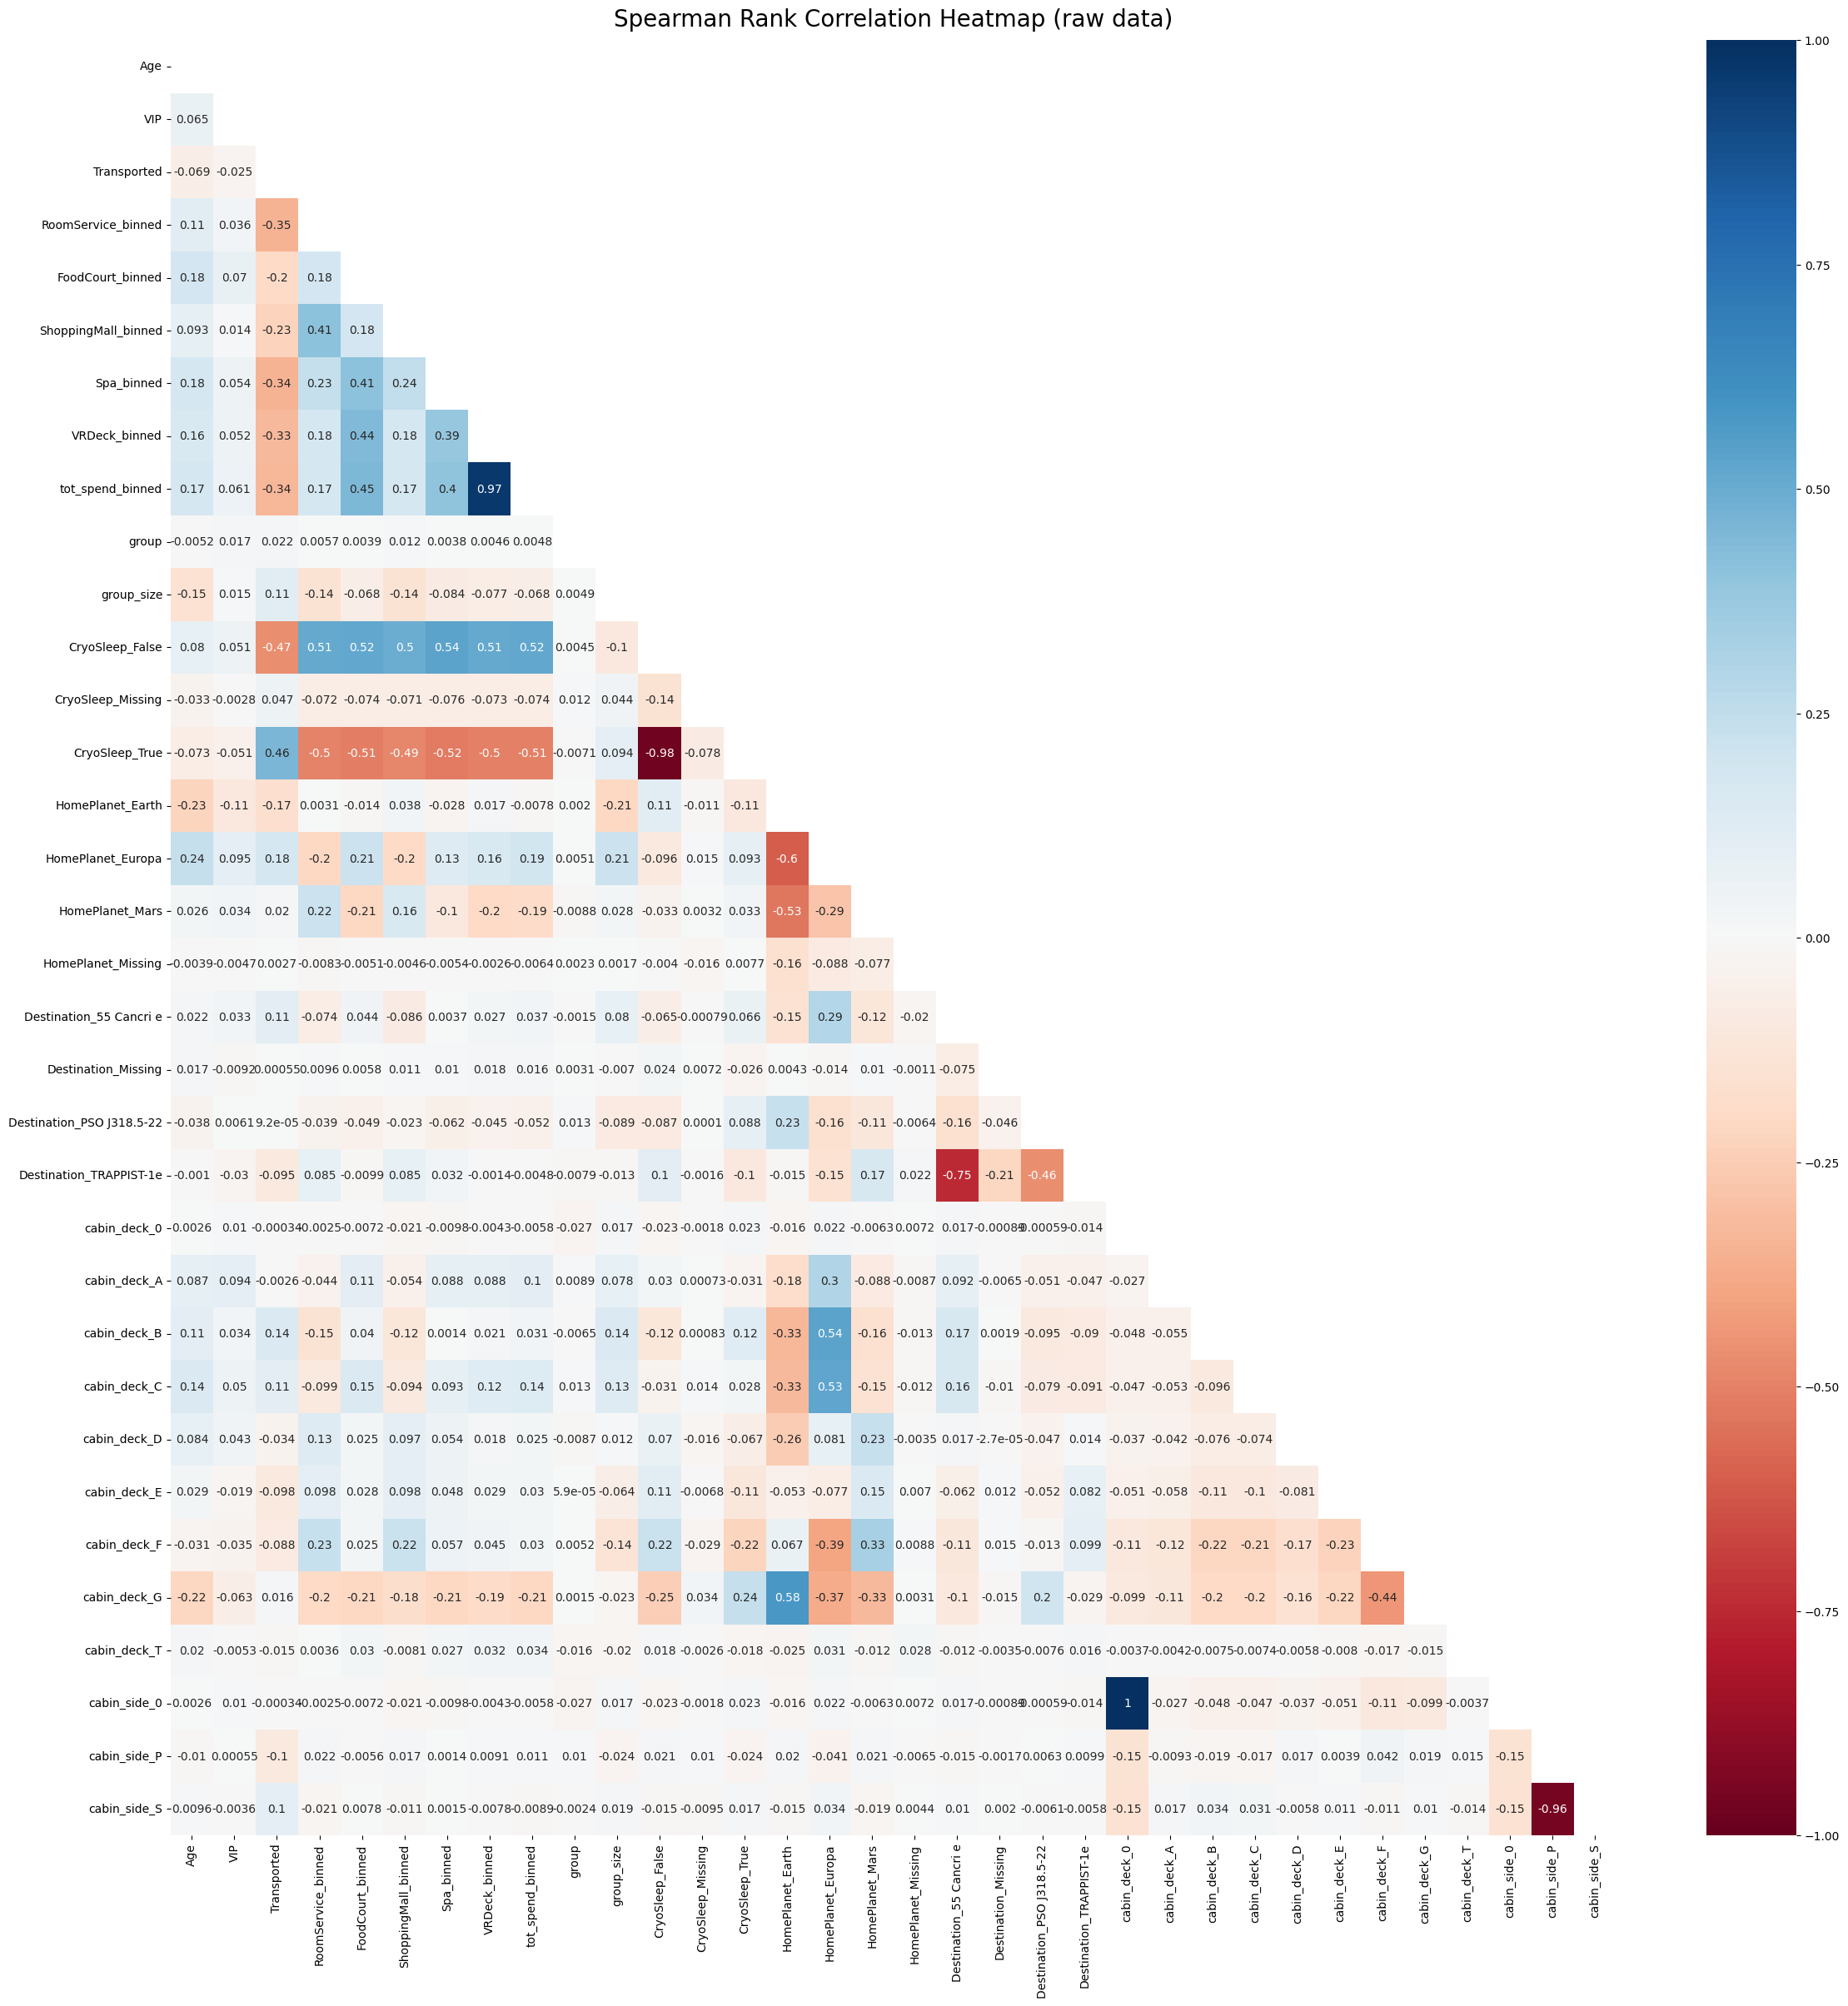

In [168]:
correlation = corr_vars.corr(method='spearman')
plt.figure(figsize=(28,28))
heatmap = sns.heatmap(correlation, mask=np.triu(correlation, 0), annot=True, cmap='RdBu', vmin=-1, vmax=1)
heatmap.set_title('Spearman Rank Correlation Heatmap (raw data)', fontdict={'fontsize':20}, pad=12)
plt.show()

From here, correlations with coefficients over |0.4| include: 
- CryoSleep_False and Transported (-0.47), CryoSleep_True and Transported (0.46),
- Transported and binned billed variables (-0.2- -0.35), 
- Billed variables are correlated with each other and with CryoSleep (positive correlations)
- HomePlanet_Earth is correlated with cabin_deck_G (0.58), and negatively with the other two home planets (Mars and Europa),
- HomePlanet_Europa is correlated with cabin_deck B and C (0.54, 0.53 respectively),
- Destination_55 Cancri e is negatively correlated with Destination_TRAPPIST-1e, (-0.75),
- Destination_PSO J3185-22 is also negatively correlated with Destination_TRAPPIST-1e (-0.46), 
- Cabin_deck_G and cabin_deck_F are negatively correlated with each other (-0.44), and
- Cabin_side_S and cabin_side_P are negatively correlated with each other (-0.96). 

No correlations are seen with cabin_deck_T, which is the smallest cabin with barely any passengers. 

As this correlation map is quite large and hard to read, correlations with the target variable can be examined: 

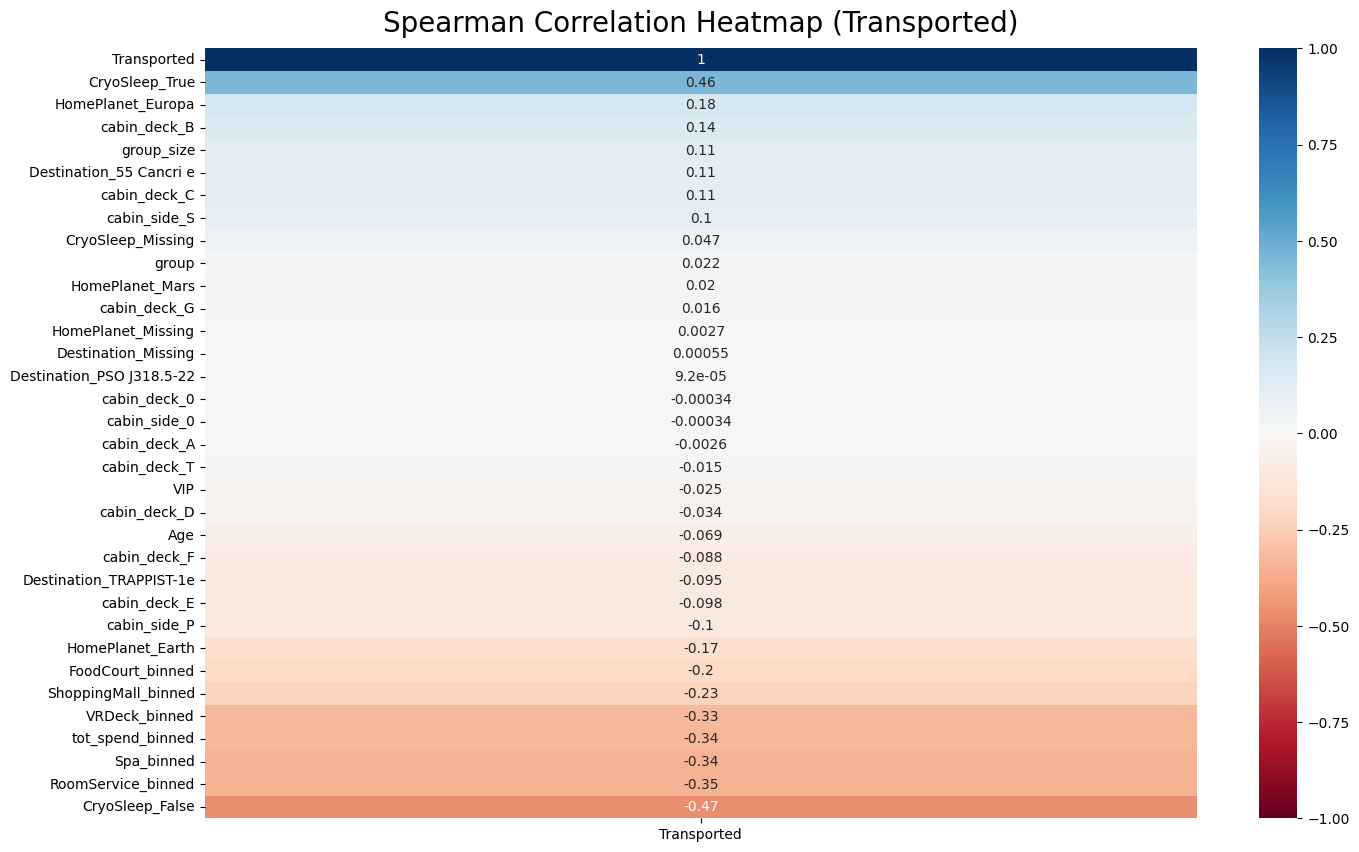

In [169]:
plt.figure(figsize=(16,10))
heatmap = sns.heatmap(correlation[['Transported']].sort_values(by='Transported', ascending=False), annot=True, cmap='RdBu', vmin=-1, vmax=1)
heatmap.set_title('Spearman Correlation Heatmap (Transported)', fontdict={'fontsize':20}, pad=12)
plt.show()

From here, the strongest positive correlation with the transported variable is with CryoSleep_True (0.46), followed by HomePlanet_Europa (0.18). This suggests that those in CryoSleep are more likely to be transported than not. The strongest negative correlations are CryoSleep_False (-0.47), followed by the billed binned variables (RoomService_binned, Spa_binned, tot_spend_binned, VRDeck_binned), which suggests that spending money on these amenities on the ship lead to not getting transported as frequently as those not spending money in these categories. 

Summary: 

So far, exploratory data analysis has shown: 
- Passengers are generally aged 20-40 years old, 
- 50% of passengers do not spend any money on billed variables (Room Service, Rood Court, Shopping Mall, Spa, and VRDeck), 
- Most people travel alone, 
- Most people are from Earth, 
- Most people did not choose to be in cryosleep, 
- The largest cabin_decks are G and F, and the smallest is cabin deck T. 
- Most people are travelling to TRAPPIST-1e, 
- Most people are not VIP passengers, and most people have unique names. 

As for passengers transported to another dimension, 
- This accounts for about half of total passengers (in the training data set).
- Passengers that spend a total of over 750$ are less likely to get transported to another dimension. 
- Passengers travelling in group sizes from 2-7 people are transported a little more often than not. 
- Passengers from Europa have the highest rate of being transported compared to passengers from Earth or Mars. 
- Those in cryosleep have a higher chance of being transported than not (about 82% of those in cryosleep were transported to another dimension). 
- Passengers travelling to 55 Cancri e have a slightly higher chance of being transported than not.


# Statistical Inference

Before implementing machine learning models, some statistical tests are performed to examine the relationship of variables in the dataset with the stroke variable, or to examine any prominent relationships between other variables in this dataset. 

Here, the **target population** is the population of people aboard the _Spaceship Titanic_.

## Numerical variables

Numerical variables (age, group) will first be examined for normality using a QQ plot, and then with a Kolmogoriv-Smirnov test. Then, these will be compared with the stroke variable using either a student t-test or a Mann-Whitney U test, in the case of non-normal data. For all tests, a 95% confidence interval will be used. 


### Normality tests for the distributions: 
- QQ Plot
- Shapiro-Wilk or Kolmogoriv-Smirnov


Starting with numerical variables, and checking for normality for the age and group variables with a QQ plot: 

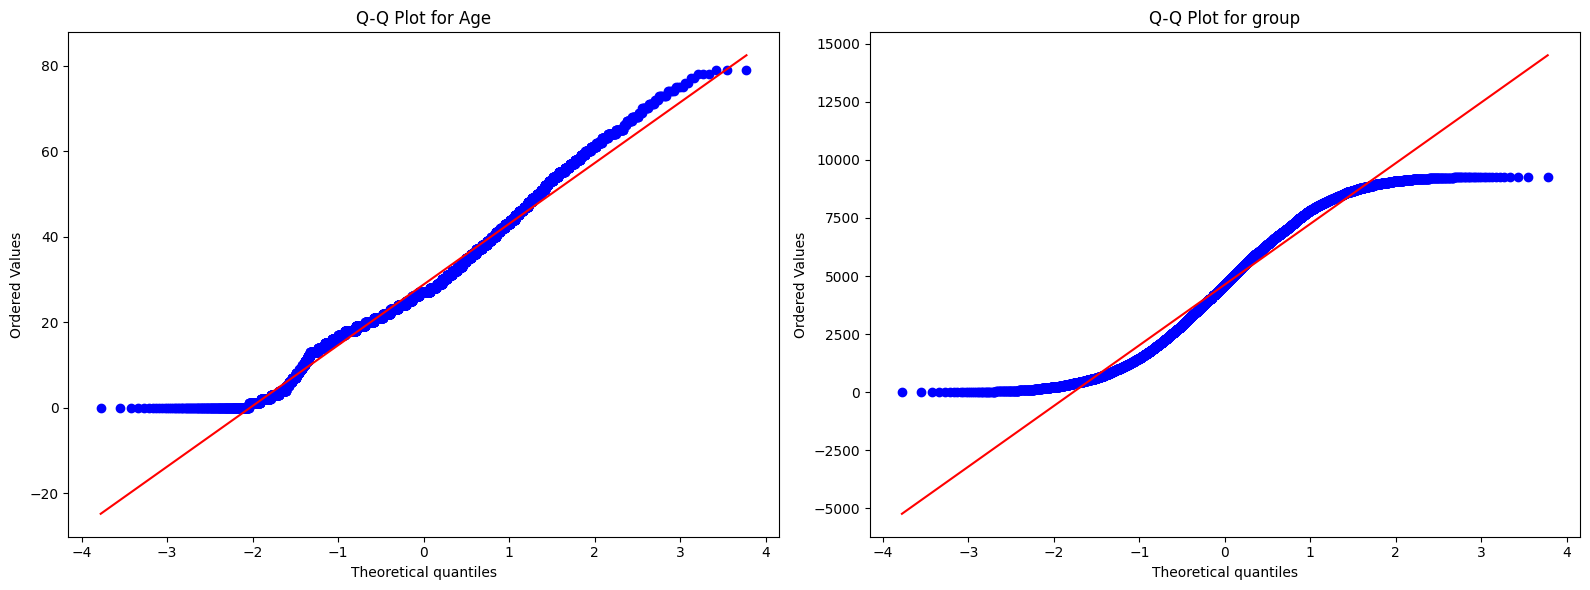

In [170]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(16, 6)
plot_qq(train['Age'], axs[0])
plot_qq(train['group'], axs[1])
plt.tight_layout()
plt.show()

As seen in these plots, age and group number do not seem to follow a completely normal distribution at the ends. This can be further corroborated with a Kolmogorov-Smirnov test for normality, as this dataset is larger than 50 samples (otherwise the Shapiro-Wilk test could be used). 

In this case, the **null hypothesis** (H0) is that the distribution is normally distributed. 

The **alternative hypothesis** (Ha) is that the distribution does not follow a normal distribution. 

This will be done at the 95% confidence level. 

In [171]:
alpha = 0.05

stat, p = kstest(train['Age'], 'norm')
print(f"Kolmogorov-Smirnov Test for Age: p-value = {p}")
if p < alpha:
    print(f"Reject the null hypothesis; the distribution for Age is not normally distributed.")
    print()
else: 
    print(f"Fail to reject the null hypothesis; there is no evidence against normality for the Age variable.")
    print()

stat, p = kstest(train['group'], 'norm')
print(f"Kolmogorov-Smirnov Test for Age: p-value = {p}")
if p < alpha:
    print(f"Reject the null hypothesis; the distribution for group number is not normally distributed.")
    print()
else: 
    print(f"Fail to reject the null hypothesis; there is no evidence against normality for the group number variable.")
    print()

Kolmogorov-Smirnov Test for Age: p-value = 0.0
Reject the null hypothesis; the distribution for Age is not normally distributed.

Kolmogorov-Smirnov Test for Age: p-value = 0.0
Reject the null hypothesis; the distribution for group number is not normally distributed.



### Mann-Whitney U test: 

As seen in the QQ plot, they cannot be said to be normally distributed. Therefore, a Mann-Whitney U test will be performed to test significance with the transported variable, as the samples are assumed to be independent. 

For the Mann-Whitney U test, the hypotheses are: 

**Null hypothesis (H0)**: there is no relationship between the numerical variable and whether the patient has been transported or not (the people who were transported have the same distribution as those who were not). 

**Alternative hypothesis (Ha)**: there is a statistically significant difference between the distribution for the people who were transported and the distribution for the people who were not. 

In [172]:
lower_bound, upper_bound = Mann_Whit(train, 'Transported', 'Age')


U-statistic: 10202619.5
P-value: 9.574725064029598e-11
Reject the null hypothesis - There is a relationship between Transported and Age
95% Confidence Interval for Mann-Whitney U statistic: (9976331.99, 10446455.16)


In this case, a relationship is seen between age and transportation to a new dimension. Therefore, this test can be repeated with alternative='greater' to see if the sample of people who have been transported tend towards larger values than those who have not. 

Now, the **null hypothesis (H0)** is that the distribution of the numerical variable for people who have not been Transported is larger or equal than the numerical value for people who have had been transported. 

The **alternative hypothesis (Ha)** is that the numerical variable distribution for people who have been transported tends towards higher values than the numerical value for people who have been transported. 

In [173]:
lower_bound, upper_bound = Mann_Whit_gr1_greater(train, 'Transported', 'Age')

U-statistic: 10202619.5
P-value: 4.787362532014799e-11
Reject the null hypothesis - the distribution of those transported tends towards larger values than the distribution of those not transported.
95% Confidence Interval for Mann-Whitney U statistic: (9982427.06, 10430106.99)


Here, it seems that the sample of people who are transported is generally older than those not transported, which agrees with observations in the phi-k correlation matrix.
In each case, the fact that the 95% confidence interval is quite large indicates that the results from the Mann-Whitney U test are reliable, as this is a measure of the frequency of one group having higher values than the other.   

Looking at group numbers in the same way: 

In [174]:
lower_bound, upper_bound = Mann_Whit(train, 'Transported', 'group')


U-statistic: 9208046.5
P-value: 0.04235740639659937
Reject the null hypothesis - There is a relationship between Transported and group
95% Confidence Interval for Mann-Whitney U statistic: (8969523.74, 9433352.46)


In this case, a relationship is seen between group number and transportation to a new dimension. Therefore, this test can be repeated with alternative='less' to see if the sample of people who have not been transported tend towards smaller values than those who have not. 

Now, the **null hypothesis (H0)** is that the distribution of the numerical variable for people who have not been Transported is larger or equal than the numerical value for people who have had been transported. 

The **alternative hypothesis (Ha)** is that the numerical variable distribution for people who have been transported tends towards smaller values than the numerical value for people who have been transported. 

In [175]:
lower_bound, upper_bound = Mann_Whit_gr0_less(train, 'Transported', 'group')

U-statistic: 9208046.5
P-value: 0.021178703198299686
Reject the null hypothesis - the distribution of those not transported tends towards smaller values than the distribution of those transported.
95% Confidence Interval for Mann-Whitney U statistic: (8982331.00, 9431374.84)


There is statistical evidence here that group numbers for those not transported tend towards smaller values than group numbers for those who were transported. 

## Chi squared test for categorical variables: 

Categorical variables will be compared with the transported variable using chi-squared tests, as the dataset is large enough to have at lease 5 observations in each category. In this case, the hypotheses are: 

**Null hypothesis (H0)**: there is no relationship between the categorical variable and whether the patient had been transported or not. 

**Alternative hypothesis (Ha)**: The corresponding alternative hypothesis is that the categorical variable is related to tranportation indicence to another dimension. 

These categorical variables will be all those in the Spearman correlation matrices, except for age and group, as the group variable has many unique values.

Getting a list of categorical columns: 

In [176]:
corr_vars = pd.concat([corr_vars, dropped_missing_cols], axis=1)

In [177]:
cat_cols = corr_vars.columns.tolist()
cat_cols.remove('group')
cat_cols.remove('Age')

The remaining categorical variables can now be tested against the stroke variable to confirm observations seen in the correlation plots: 

In [178]:
for c in cat_cols:
    print(c)
    chisq(corr_vars, c, 'Transported')
    print()

VIP
contingengy table 
 Transported     0     1
VIP                    
0            4093  4198
1             222   180
Chi-Squared Statistic: 5.029829060893982
p-value: 0.02491435732106778
Degrees of Freedom: 1
Reject the null hypothesis - There is a relationship between VIP and Transported

Transported
contingengy table 
 Transported     0     1
Transported            
0            4315     0
1               0  4378
Chi-Squared Statistic: 8689.000250089412
p-value: 0.0
Degrees of Freedom: 1
Reject the null hypothesis - There is a relationship between Transported and Transported

RoomService_binned
contingengy table 
 Transported            0     1
RoomService_binned            
0.0                 2220  3655
1.0                  450   262
2.0                  494    78
3.0                  616   273
4.0                  507   110
5.0                   28     0
Chi-Squared Statistic: 1118.077103374275
p-value: 1.6267957757243382e-239
Degrees of Freedom: 5
Reject the null hypothesis - 

From here, categorical variables that ARE related to transportation incidence are: 
- VIP
- RoomService_binned
- FoodCourt_binned
- ShoppingMall_binned
- Spa_binned
- VRDeck_binned
- tot_spend_binned
- group_size
- CryoSleep
- HomePlanet_Europa and HomePlanet_Earth
- Destination 55 Cancri e and TRAPPIST-1e
- Cabin_deck_B, C, D, E, F
- Cabin_side_P, S

Categorical variables that are NOT related to transportation incidence are: 
- HomePlanet_Mars
- Destination PSO J318.5-22
- Cabin_deck_0
- Cabin_deck_A, G, T
- Cabin_side_0
- indicator variables (HomePlanet_missing, Destination_missing, RoomService_missing, FoodCourt_missing, ShoppingMall_missing, Spa_missing, VRDeck_missing)

From a chi-squared test alone, it is impossible to tell the strength of the relationship between these variables and transportation incidence. It is important to note that some of these relationships between categorical variables and being transported could be due to multicollinearity. Indeed, most of the categorical variables found to be related to transportation incidence (ex: cabin decks) were not shown to have strong correlations from the heatmaps shown previously. This is important to keep in mind during modelling, and more examination into the strength and direction of association between categorical variables and transportation incidence could be necessary depending on which modeling techniques are chosen. 

## Variance Inflation Factor

Finally, the variance inflation factor (VIF) is checked with the processed dataset to further examine potential multicollinearity. Initially, this gives: 

In [179]:
vif(train_copy)

/Users/bt/Documents/turing/ml_3/.venv/lib/python3.13/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF,multicollinearity warning strength
15,group,1.004426,small
1,VIP,1.033406,small
16,group_size,1.102264,small
0,Age,1.179467,small
7,Transported,1.620554,small
11,ShoppingMall_binned,1.671196,small
12,Spa_binned,1.675799,small
9,RoomService_binned,1.756729,small
10,FoodCourt_binned,1.825390,small
13,VRDeck_binned,2.888947,small


This does not work, as there is a division by zero warning. Therefore, a logistic regression model will likely not be possible with the entire processed dataset. One by one, variables are removed until all VIF levels are under 5. This results in: 

In [180]:
v = train_copy.drop(['Age', 'cabin_side_S', 'CryoSleep_True', 'CryoSleep_False', 'HomePlanet_Europa', 'ShoppingMall', 'cabin_deck_A', 'cabin_side_0', 'Destination_TRAPPIST-1e', 'tot_spend', 'HomePlanet_Earth'], axis=1)
vif(v)

,feature,VIF,multicollinearity warning strength
27,cabin_deck_T,1.008288,small
14,CryoSleep_Missing,1.024738,small
18,Destination_Missing,1.031750,small
16,HomePlanet_Missing,1.038015,small
0,VIP,1.074192,small
20,cabin_deck_0,1.176585,small
19,Destination_PSO J318.5-22,1.200368,small
17,Destination_55 Cancri e,1.401355,small
3,Spa,1.510215,small
1,RoomService,1.602006,small


Using these variables, a logistic regression model could be used. 